# **Predicting Employee Retention**

### Objective

The objective of this assignment is to develop a Logistic Regression model. You will be using this model to analyse and predict binary outcomes based on the input data. This assignment aims to enhance understanding of logistic regression, including its assumptions, implementation, and evaluation, to effectively classify and interpret data.


### Business Objective

A mid-sized technology company wants to improve its understanding of employee retention to foster a loyal and committed workforce. While the organization has traditionally focused on addressing turnover, it recognises the value of proactively identifying employees likely to stay and understanding the factors contributing to their loyalty.


In this assignment you’ll be building a logistic regression model to predict the likelihood of employee retention based on the data such as demographic details, job satisfaction scores, performance metrics, and tenure. The aim is to provide the HR department with actionable insights to strengthen retention strategies, create a supportive work environment, and increase the overall stability and satisfaction of the workforce.

## Assignment Tasks

You need to perform the following steps to complete this assignment:
1. Data Understanding
2. Data Cleaning
3. Train Validation Split
4. EDA on training data
5. EDA on validation data [Optional]
6. Feature Engineering
7. Model Building
8. Prediction and Model Evaluation




## Data Dictionary

The data has 24 Columns and 74610 Rows. Following data dictionary provides the description for each column present in dataset:<br>

<table>
  <thead>
    <tr>
      <th>Column Name</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Employee ID</td>
      <td>A unique identifier assigned to each employee.</td>
    </tr>
    <tr>
      <td>Age</td>
      <td>The age of the employee, ranging from 18 to 60 years.</td>
    </tr>
    <tr>
      <td>Gender</td>
      <td>The gender of the employee.</td>
    </tr>
    <tr>
      <td>Years at Company</td>
      <td>The number of years the employee has been working at the company.</td>
    </tr>
    <tr>
      <td>Monthly Income</td>
      <td>The monthly salary of the employee, in dollars.</td>
    </tr>
    <tr>
      <td>Job Role</td>
      <td>The department or role the employee works in, encoded into categories such as Finance, Healthcare, Technology, Education, and Media.</td>
    </tr>
    <tr>
      <td>Work-Life Balance</td>
      <td>The employee's perceived balance between work and personal life (Poor, Below Average, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Job Satisfaction</td>
      <td>The employee's satisfaction with their job (Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Performance Rating</td>
      <td>The employee's performance rating (Low, Below Average, Average, High).</td>
    </tr>
    <tr>
      <td>Number of Promotions</td>
      <td>The total number of promotions the employee has received.</td>
    </tr>
     </tr>
     <tr>
      <td>Overtime</td>
      <td>Number of overtime hours.</td>
    </tr>
    <tr>
      <td>Distance from Home</td>
      <td>The distance between the employee's home and workplace, in miles.</td>
    </tr>
    <tr>
      <td>Education Level</td>
      <td>The highest education level attained by the employee (High School, Associate Degree, Bachelor’s Degree, Master’s Degree, PhD).</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>The marital status of the employee (Divorced, Married, Single).</td>
    </tr>
     <tr>
      <td>Number of Dependents</td>
      <td>Number of dependents the employee has.</td>
    </tr>
    <tr>
      <td>Job Level</td>
      <td>The job level of the employee (Entry, Mid, Senior).</td>
    </tr>
    <tr>
      <td>Company Size</td>
      <td>The size of the company the employee works for (Small, Medium, Large).</td>
    </tr>
    <tr>
      <td>Company Tenure (In Months)</td>
      <td>The total number of years the employee has been working in the industry.</td>
    </tr>
    <tr>
      <td>Remote Work</td>
      <td>Whether the employee works remotely (Yes or No).</td>
    </tr>
    <tr>
      <td>Leadership Opportunities</td>
      <td>Whether the employee has leadership opportunities (Yes or No).</td>
    </tr>
    <tr>
      <td>Innovation Opportunities</td>
      <td>Whether the employee has opportunities for innovation (Yes or No).</td>
    </tr>
    <tr>
      <td>Company Reputation</td>
      <td>The employee's perception of the company's reputation (Very Poor, Poor, Good, Excellent).</td>
    </tr>
    <tr>
      <td>Employee Recognition</td>
      <td>The level of recognition the employee receives(Very Low, Low, Medium, High).</td>
    </tr>
    <tr>
      <td>Attrition</td>
      <td>Whether the employee has left the company.</td>
    </tr>
  </tbody>
</table>


## **1. Data Understanding**

In this step, load the dataset and check basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [1]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries
import numpy as np
import pandas as pd

### **1.1 Load the Data**

In [3]:
# Load the dataset
df=pd.read_csv("/content/Employee_data.csv")

In [4]:
# Check the first few entries
df.head()

Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

   ... Number of Dependents  Job Level Company Size  \
0  ...                    0        Mid       Medium   
1  ...                    3        Mid       Medium   
2  ...                    3        Mid       Medium   
3  ...                    2        Mid        Small   
4  ...                    0     Senior       Medium   

  Company Tenure (In Months)  Remote Work Leadership Opportunities  \
0                       89.0           No                       No   
1                       21.0           No                       No   
2                       74.0           No                       No   
3                       50.0          Yes                       No   
4                       68.0           No                       No   

  Innovation Opportunities  Company Reputation Employee Recognition Attrition  
0                       No           Excellent               Medium    Stayed  
1                       No                Fair                  Low    Stayed  
2                       No                Poor                  Low    Stayed  
3                       No                Good               Medium    Stayed  
4                       No                Fair               Medium    Stayed  

[5 rows x 24 columns]

In [5]:
# Inspect the shape of the dataset
df.shape

(74610, 24)

In [6]:
# Inspect the different columns in the dataset
df.columns


Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size',
       'Company Tenure (In Months)', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation',
       'Employee Recognition', 'Attrition'],
      dtype='object')

### **1.2 Check the basic statistics**

In [8]:
# Check the summary of the dataset
pd.set_option('display.max_columns', None)
df.describe(include='all')

Employee ID           Age Gender  Years at Company    Job Role  \
count   74610.000000  74610.000000  74610      74610.000000       74610   
unique           NaN           NaN      2               NaN           5   
top              NaN           NaN   Male               NaN  Technology   
freq             NaN           NaN  40898               NaN       19350   
mean    37246.028696     38.529379    NaN         15.722638         NaN   
std     21505.785344     12.082299    NaN         11.224059         NaN   
min         1.000000     18.000000    NaN          1.000000         NaN   
25%     18624.250000     28.000000    NaN          7.000000         NaN   
50%     37239.500000     39.000000    NaN         13.000000         NaN   
75%     55871.750000     49.000000    NaN         23.000000         NaN   
max     74498.000000     59.000000    NaN         51.000000         NaN   

        Monthly Income Work-Life Balance Job Satisfaction Performance Rating  \
count     74610.000000             74610            74610              74610   
unique             NaN                 4                4                  4   
top                NaN              Good             High            Average   
freq               NaN             28196            37306              44786   
mean       7344.931417               NaN              NaN                NaN   
std        2596.373589               NaN              NaN                NaN   
min        1226.000000               NaN              NaN                NaN   
25%        5652.000000               NaN              NaN                NaN   
50%        7348.500000               NaN              NaN                NaN   
75%        8876.000000               NaN              NaN                NaN   
max       50030.000000               NaN              NaN                NaN   

        Number of Promotions Overtime  Distance from Home  \
count           74610.000000    74610        72698.000000   
unique                   NaN        2                 NaN   
top                      NaN       No                 NaN   
freq                     NaN    50230                 NaN   
mean                0.832958      NaN           49.990839   
std                 0.995326      NaN           28.519135   
min                 0.000000      NaN            1.000000   
25%                 0.000000      NaN           25.000000   
50%                 1.000000      NaN           50.000000   
75%                 2.000000      NaN           75.000000   
max                 4.000000      NaN           99.000000   

            Education Level Marital Status  Number of Dependents Job Level  \
count                 74610          74610          74610.000000     74610   
unique                    5              3                   NaN         3   
top     Bachelorâ€™s Degree        Married                   NaN     Entry   
freq                  22365          37470                   NaN     29820   
mean                    NaN            NaN              1.657432       NaN   
std                     NaN            NaN              1.579862       NaN   
min                     NaN            NaN              0.000000       NaN   
25%                     NaN            NaN              0.000000       NaN   
50%                     NaN            NaN              1.000000       NaN   
75%                     NaN            NaN              3.000000       NaN   
max                     NaN            NaN             15.000000       NaN   

       Company Size  Company Tenure (In Months) Remote Work  \
count         74610                72197.000000       74610   
unique            3                         NaN           2   
top          Medium                         NaN          No   
freq          37281                         NaN       60390   
mean            NaN                   55.711899         NaN   
std             NaN                   25.392325         NaN   
min             NaN                 

### **1.3 Check the data type of columns**

In [9]:
# Check the info to see the types of the feature variables and the null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74610 entries, 0 to 74609
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee ID                 74610 non-null  int64  
 1   Age                         74610 non-null  int64  
 2   Gender                      74610 non-null  object 
 3   Years at Company            74610 non-null  int64  
 4   Job Role                    74610 non-null  object 
 5   Monthly Income              74610 non-null  int64  
 6   Work-Life Balance           74610 non-null  object 
 7   Job Satisfaction            74610 non-null  object 
 8   Performance Rating          74610 non-null  object 
 9   Number of Promotions        74610 non-null  int64  
 10  Overtime                    74610 non-null  object 
 11  Distance from Home          72698 non-null  float64
 12  Education Level             74610 non-null  object 
 13  Marital Status              746

## **2. Data Cleaning** <font color = red>[15 marks]</font>

### **2.1 Handle the missing values** <font color = red>[10 marks]</font>

2.1.1 Check the number of missing values <font color="red">[2 Mark]</font>

In [10]:
# Check the number of missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Employee ID                      0
Age                              0
Gender                           0
Years at Company                 0
Job Role                         0
Monthly Income                   0
Work-Life Balance                0
Job Satisfaction                 0
Performance Rating               0
Number of Promotions             0
Overtime                         0
Distance from Home            1912
Education Level                  0
Marital Status                   0
Number of Dependents             0
Job Level                        0
Company Size                     0
Company Tenure (In Months)    2413
Remote Work                      0
Leadership Opportunities         0
Innovation Opportunities         0
Company Reputation               0
Employee Recognition             0
Attrition                        0
dtype: int64


2.1.2 Check the percentage of missing values <font color="red">[2 Marks]</font>

In [11]:
# Check the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Employee ID                   0.000000
Age                           0.000000
Gender                        0.000000
Years at Company              0.000000
Job Role                      0.000000
Monthly Income                0.000000
Work-Life Balance             0.000000
Job Satisfaction              0.000000
Performance Rating            0.000000
Number of Promotions          0.000000
Overtime                      0.000000
Distance from Home            2.562659
Education Level               0.000000
Marital Status                0.000000
Number of Dependents          0.000000
Job Level                     0.000000
Company Size                  0.000000
Company Tenure (In Months)    3.234151
Remote Work                   0.000000
Leadership Opportunities      0.000000
Innovation Opportunities      0.000000
Company Reputation            0.000000
Employee Recognition          0.000000
Attrition                     0.000000
dtype: float64


2.1.3 Handle rows with missing values <font color="red">[4 Marks]</font>

In [12]:
# Handle the missing value rows in the column
# Fill missing values with the mean for numerical columns or mode for categorical columns
df['Distance from Home'].fillna(df['Distance from Home'].mean(), inplace=True)
df['Company Tenure (In Months)'].fillna(df['Company Tenure (In Months)'].mean(), inplace=True)


2.1.4 Check percentage of remaning data after missing values are removed <font color="red">[2 Mark]</font>

In [13]:
# Check the percentage of remaining data after missing values are removed
missing_percentage_new = df.isnull().mean() * 100
print(missing_percentage_new)

Employee ID                   0.0
Age                           0.0
Gender                        0.0
Years at Company              0.0
Job Role                      0.0
Monthly Income                0.0
Work-Life Balance             0.0
Job Satisfaction              0.0
Performance Rating            0.0
Number of Promotions          0.0
Overtime                      0.0
Distance from Home            0.0
Education Level               0.0
Marital Status                0.0
Number of Dependents          0.0
Job Level                     0.0
Company Size                  0.0
Company Tenure (In Months)    0.0
Remote Work                   0.0
Leadership Opportunities      0.0
Innovation Opportunities      0.0
Company Reputation            0.0
Employee Recognition          0.0
Attrition                     0.0
dtype: float64


### **2.2 Identify and handle redundant values within categorical columns (if any)** <font color = red>[3 marks]</font>

Examine the categorical columns to determine if any value or column needs to be treated

In [15]:
# Check the data
df.head()


Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0         8410   31    Male                19   Education            5390   
1        64756   59  Female                 4       Media            5534   
2        30257   24  Female                10  Healthcare            8159   
3        65791   36  Female                 7   Education            3989   
4        65026   56    Male                41   Education            4821   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average                     2   
1              Poor             High                Low                     3   
2              Good             High                Low                     0   
3              Good             High               High                     1   
4              Fair        Very High            Average                     0   

  Overtime  Distance from Home      Education Level Marital Status  \
0       No                22.0     Associate Degree        Married   
1       No                21.0    Masterâ€™s Degree       Divorced   
2       No                11.0  Bachelorâ€™s Degree        Married   
3       No                27.0          High School         Single   
4      Yes                71.0          High School       Divorced   

   Number of Dependents Job Level Company Size  Company Tenure (In Months)  \
0                     0       Mid       Medium                        89.0   
1                     3       Mid       Medium                        21.0   
2                     3       Mid       Medium                        74.0   
3                     2       Mid        Small                        50.0   
4                     0    Senior       Medium                        68.0   

  Remote Work Leadership Opportunities Innovation Opportunities  \
0          No                       No                       No   
1          No                       No                       No   
2          No                       No                       No   
3         Yes                       No                       No   
4          No                       No                       No   

  Company Reputation Employee Recognition Attrition  
0          Excellent               Medium    Stayed  
1               Fair                  Low    Stayed  
2               Poor                  Low    Stayed  
3               Good               Medium    Stayed  
4               Fair               Medium    Stayed

In [16]:
# Function to display categorical columns with their unique values
def check_redundant_values(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    redundant_values = {}

    for column in categorical_columns:
        unique_values = df[column].unique()
        redundant_values[column] = unique_values

    return redundant_values

# Display the unique values in categorical columns
redundant_values = check_redundant_values(df)
print(redundant_values)


{'Gender': array(['Male', 'Female'], dtype=object), 'Job Role': array(['Education', 'Media', 'Healthcare', 'Technology', 'Finance'],
      dtype=object), 'Work-Life Balance': array(['Excellent', 'Poor', 'Good', 'Fair'], dtype=object), 'Job Satisfaction': array(['Medium', 'High', 'Very High', 'Low'], dtype=object), 'Performance Rating': array(['Average', 'Low', 'High', 'Below Average'], dtype=object), 'Overtime': array(['No', 'Yes'], dtype=object), 'Education Level': array(['Associate Degree', 'Masterâ€™s Degree', 'Bachelorâ€™s Degree',
       'High School', 'PhD'], dtype=object), 'Marital Status': array(['Married', 'Divorced', 'Single'], dtype=object), 'Job Level': array(['Mid', 'Senior', 'Entry'], dtype=object), 'Company Size': array(['Medium', 'Small', 'Large'], dtype=object), 'Remote Work': array(['No', 'Yes'], dtype=object), 'Leadership Opportunities': array(['No', 'Yes'], dtype=object), 'Innovation Opportunities': array(['No', 'Yes'], dtype=object), 'Company Reputation': array(['E

In [17]:
# Function to standardize redundant values in categorical columns
def standardize_values(df):
    # Example of standardizing values
    df['Job Satisfaction'] = df['Job Satisfaction'].replace({'Very High': 'High', 'Fair': 'Good'})
    df['Education Level'] = df['Education Level'].replace({'Masterâ€™s Degree': 'Master\'s Degree',
                                                           'Bachelorâ€™s Degree': 'Bachelor\'s Degree'})
    # Add more replacements as necessary
    return df

# Apply standardization
df = standardize_values(df)


### **2.3 Drop redundant columns** <font color = red>[2 marks]</font>

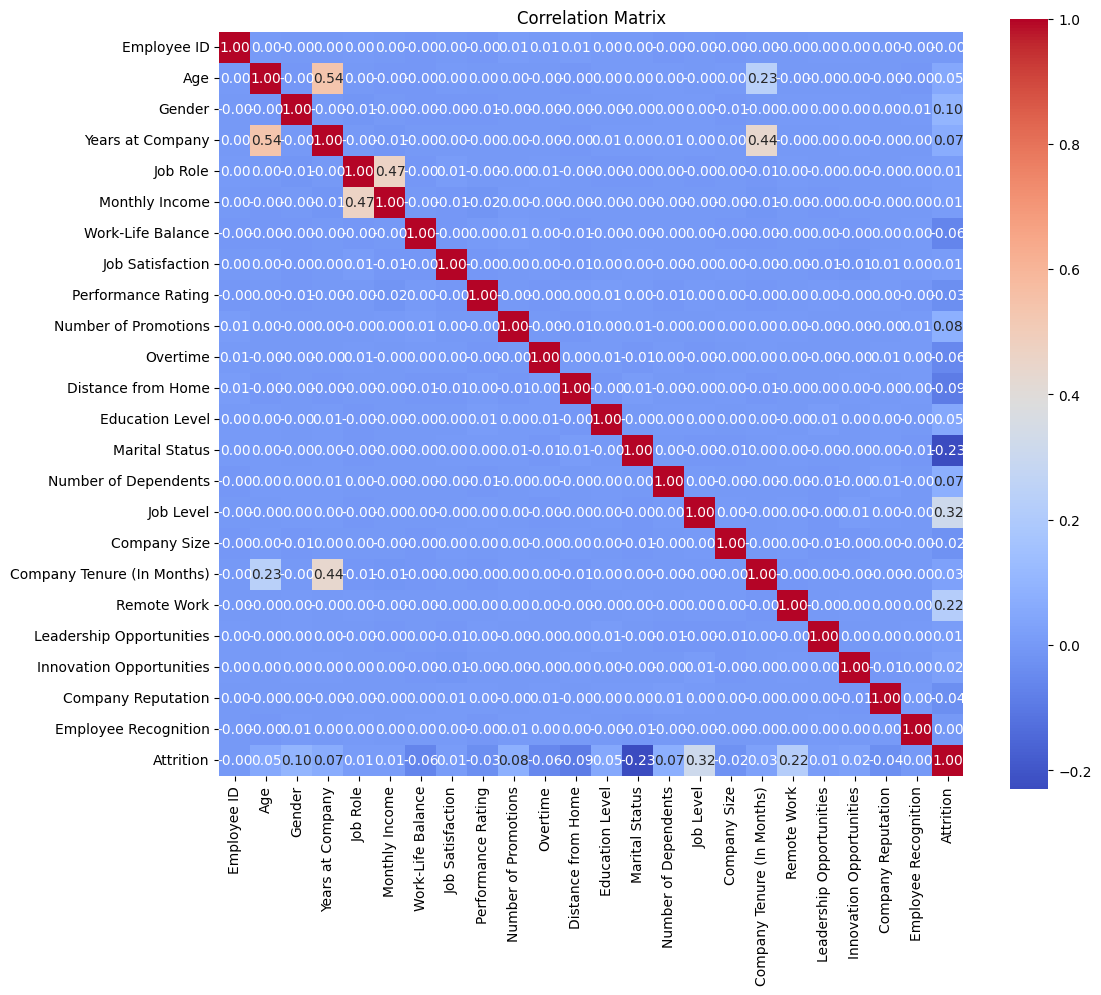

In [22]:
# Convert categorical columns to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Encode categorical columns
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Now compute the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


In [23]:
# List of columns to drop
columns_to_drop = [
    'Employee ID',
    'Gender',
    'Education Level',
    'Job Role',
    'Overtime',
    'Marital Status'
]

# Drop the identified columns
df.drop(columns=columns_to_drop, inplace=True)

# Verify the remaining columns
print("Remaining columns after dropping unnecessary ones:")
print(df.columns)


Remaining columns after dropping unnecessary ones:
Index(['Age', 'Years at Company', 'Monthly Income', 'Work-Life Balance',
       'Job Satisfaction', 'Performance Rating', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents', 'Job Level',
       'Company Size', 'Company Tenure (In Months)', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')


In [24]:
# Check first few rows of data
df.head()

Age  Years at Company  Monthly Income  Work-Life Balance  Job Satisfaction  \
0   31                19            5390                  0                 2   
1   59                 4            5534                  3                 0   
2   24                10            8159                  2                 0   
3   36                 7            3989                  2                 0   
4   56                41            4821                  1                 0   

   Performance Rating  Number of Promotions  Distance from Home  \
0                   0                     2                22.0   
1                   3                     3                21.0   
2                   3                     0                11.0   
3                   2                     1                27.0   
4                   0                     0                71.0   

   Number of Dependents  Job Level  Company Size  Company Tenure (In Months)  \
0                     0          1             1                        89.0   
1                     3          1             1                        21.0   
2                     3          1             1                        74.0   
3                     2          1             2                        50.0   
4                     0          2             1                        68.0   

   Remote Work  Leadership Opportunities  Innovation Opportunities  \
0            0                         0                         0   
1            0                         0                         0   
2            0                         0                         0   
3            1                         0                         0   
4            0                         0                         0   

   Company Reputation  Employee Recognition  Attrition  
0                   0                     2          1  
1                   1                     1          1  
2                   3                     1          1  
3                   2                     2          1  
4                   1                     2          1

In [26]:
df.dtypes

Age                             int64
Years at Company                int64
Monthly Income                  int64
Work-Life Balance               int64
Job Satisfaction                int64
Performance Rating              int64
Number of Promotions            int64
Distance from Home            float64
Number of Dependents            int64
Job Level                       int64
Company Size                    int64
Company Tenure (In Months)    float64
Remote Work                     int64
Leadership Opportunities        int64
Innovation Opportunities        int64
Company Reputation              int64
Employee Recognition            int64
Attrition                       int64
dtype: object

In [29]:
#Feature Scaling: It's often beneficial to scale numerical features to ensure they contribute equally to the model.
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features
numerical_columns = [
    'Age', 'Years at Company', 'Monthly Income', 'Distance from Home',
    'Number of Promotions', 'Company Tenure (In Months)', 'Number of Dependents'
]

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**

In [30]:
# Import Train Test Split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Mark]</font>

In [31]:
# Put all the feature variables in X
X = df.drop(columns=['Attrition'])  # Features

# Put the target variable in y
y = df['Attrition']

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [32]:
# Split the data into 70% train data and 30% validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[6 marks]</font>

Perform univariate analysis on training data for all the numerical columns.




4.1.1 Select numerical columns from training data <font color = "red">[1 Mark]</font>

In [33]:
# Select numerical columns
numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns:", numerical_columns)


Numerical Columns: Index(['Age', 'Years at Company', 'Monthly Income', 'Work-Life Balance',
       'Job Satisfaction', 'Performance Rating', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents', 'Job Level',
       'Company Size', 'Company Tenure (In Months)', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition'],
      dtype='object')


4.1.2 Plot distribution of numerical columns <font color = "red">[5 Marks]</font>

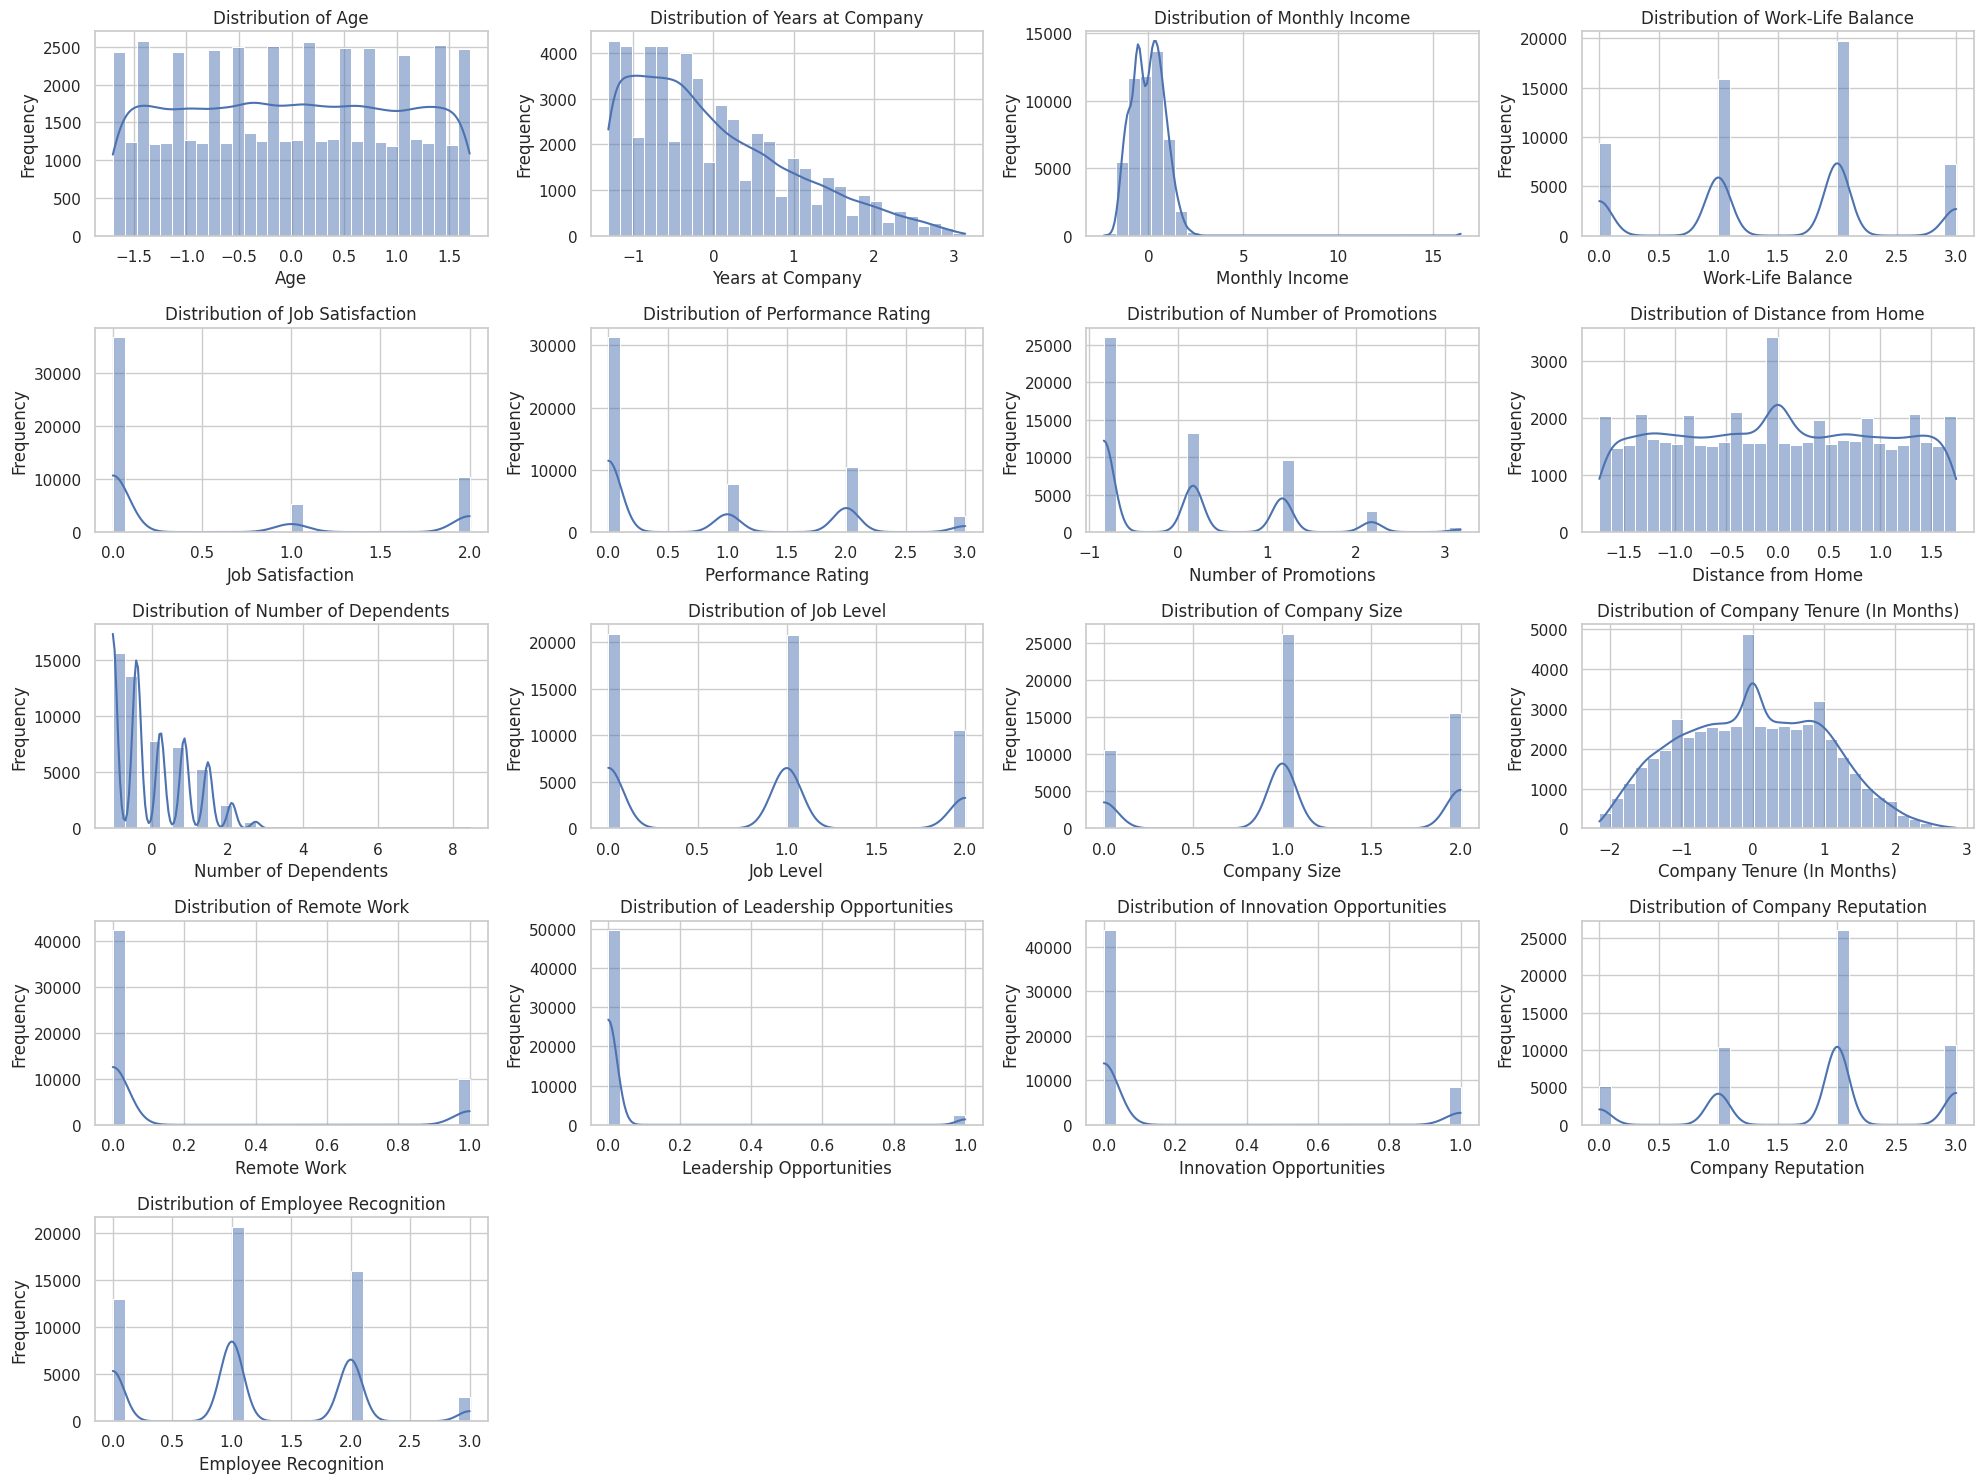

In [35]:
# Plot all the numerical columns to understand their distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot histograms for each numerical column
plt.figure(figsize=(20, 15))
num_columns = len(numerical_columns)  # Get the number of numerical columns
rows = (num_columns // 4) + 1  # Calculate the number of rows needed

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(rows, 4, i)  # Adjust the grid size based on the number of columns
    sns.histplot(X_train[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Observations from the Distribution Plots

Age: The distribution appears somewhat uniform but may have some peaks. It could suggest a diverse age range among employees.
Years at Company: This distribution is positively skewed, indicating that many employees have been with the company for a shorter duration, while fewer employees have long tenures.
Monthly Income: The distribution shows a right skew, with a significant number of employees earning lower salaries and fewer earning higher salaries. This could indicate a typical salary structure in the company.
Work-Life Balance: The distribution suggests that most employees perceive their work-life balance positively, with fewer reporting poor balance.
Job Satisfaction: The distribution is skewed towards higher satisfaction levels, indicating that most employees are relatively satisfied with their jobs.
Performance Rating: The distribution shows distinct peaks, indicating that most employees fall into specific performance categories, possibly reflecting the company's performance evaluation system.
Number of Promotions: The distribution is highly skewed, with most employees having received fewer promotions, suggesting that promotions may be relatively rare.
Distance from Home: This distribution appears relatively uniform, indicating that employees live at various distances from the workplace.
Number of Dependents: The distribution is skewed towards fewer dependents, suggesting that most employees have no or only a few dependents.
Job Level: The distribution shows peaks, indicating that there are more employees at certain job levels, possibly reflecting the company's hierarchical structure.
Company Size: The distribution is likely categorical, indicating the size of the company, with specific counts for each category.
Company Tenure (In Months): Similar to "Years at Company," this distribution is positively skewed, indicating that many employees have shorter tenures.
Remote Work: The distribution indicates a binary outcome, showing the proportion of employees working remotely versus those who do not.
Leadership Opportunities: The distribution shows a clear preference, with most employees indicating they do not have leadership opportunities.
Innovation Opportunities: Similar to leadership opportunities, this distribution suggests that many employees feel they have limited innovation opportunities.
Company Reputation: The distribution indicates varying perceptions of the company's reputation, with some employees rating it highly.
Employee Recognition: The distribution shows that most employees feel they receive medium to high recognition.

### **4.2 Perform correlation analysis** <font color="red">[4 Marks]</font>

Check the correlation among different numerical variables.

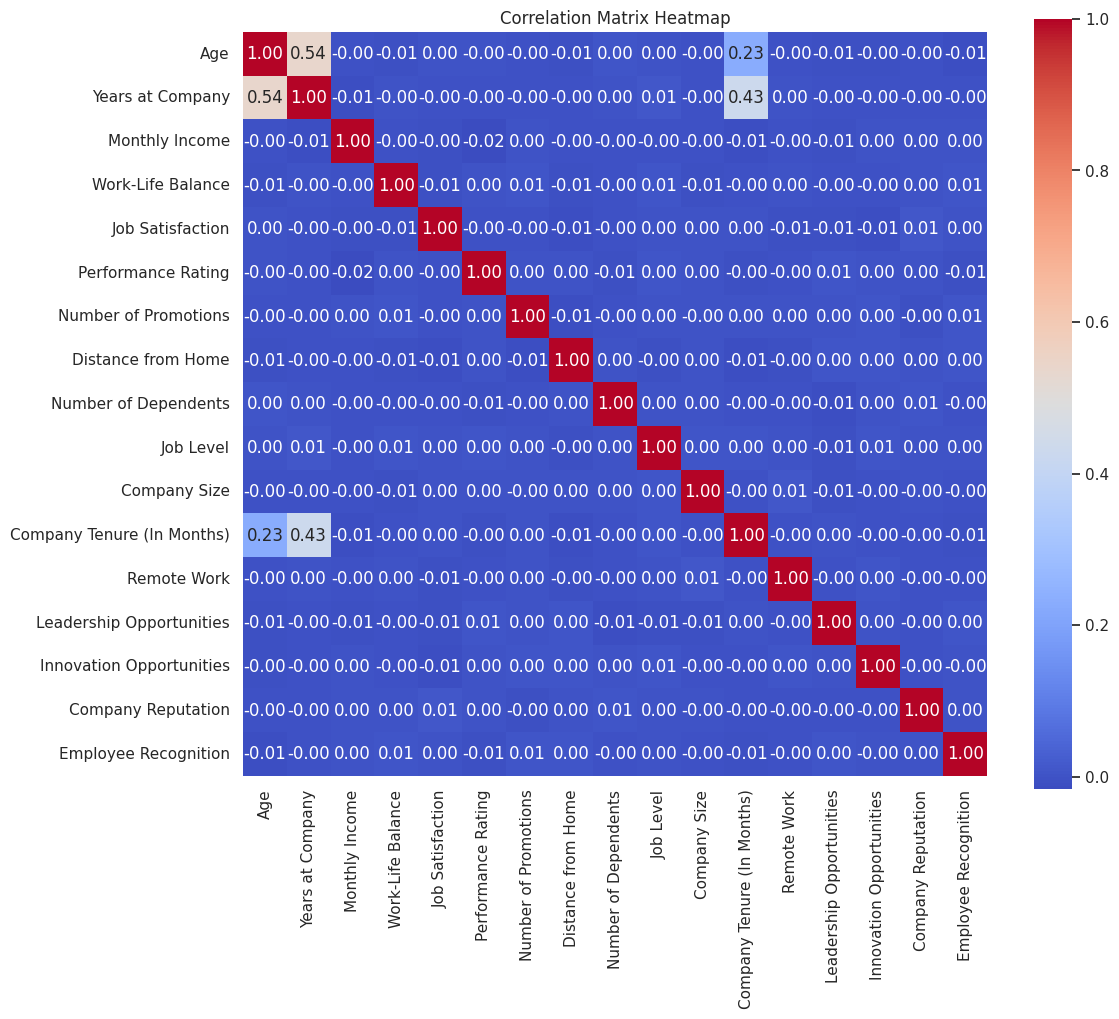

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for the numerical columns
correlation_matrix = X_train[numerical_columns].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()



Observations from the Correlation Matrix
Strong Correlations:
Age and Years at Company: There is a moderate positive correlation (0.54), suggesting that older employees tend to have more years at the company.
Company Tenure (In Months) and Years at Company: This also shows a moderate positive correlation (0.43), indicating that longer company tenure corresponds with more years at the company.
Weak Correlations:
Monthly Income: Shows very low correlation with other features, suggesting that income levels do not significantly relate to other factors like job satisfaction or performance ratings.
Work-Life Balance: The correlation with other features is minimal, indicating that perceptions of work-life balance may not strongly influence other metrics in this dataset.


### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Check the distribution of target variable in training set to check class balance.

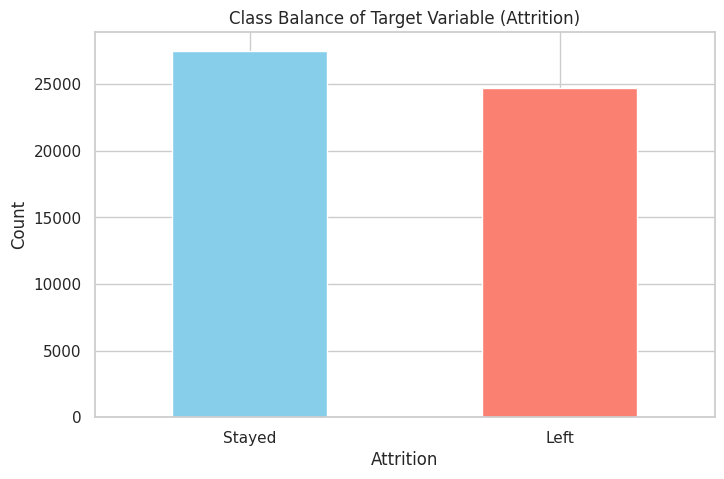

In [37]:
# Plot a bar chart to check class balance
import matplotlib.pyplot as plt

# Count the occurrences of each class in the target variable
class_counts = y_train.value_counts()

# Plot a bar chart to check class balance
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Balance of Target Variable (Attrition)')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Left'], rotation=0)
plt.show()


### **4.4 Perform bivariate analysis** <font color="red">[8 Marks]</font>

Perform bivariate analysis on training data between all the categorical columns and target variable to  analyse how the categorical variables influence the target variable.

In [43]:
# Check the data types of the columns in the DataFrame
print(X_train.dtypes)


Age                           float64
Years at Company              float64
Monthly Income                float64
Work-Life Balance               int64
Job Satisfaction                int64
Performance Rating              int64
Number of Promotions          float64
Distance from Home            float64
Number of Dependents          float64
Job Level                       int64
Company Size                    int64
Company Tenure (In Months)    float64
Remote Work                     int64
Leadership Opportunities        int64
Innovation Opportunities        int64
Company Reputation              int64
Employee Recognition            int64
dtype: object


In [44]:
# Manually specify the original categorical columns based on your understanding
original_categorical_columns = [
    'Work-Life Balance',
    'Job Satisfaction',
    'Performance Rating',
    'Job Level',
    'Company Size',
    'Remote Work',
    'Leadership Opportunities',
    'Innovation Opportunities',
    'Company Reputation',
    'Employee Recognition'
]

# Check if these columns exist in the DataFrame
for column in original_categorical_columns:
    if column in X_train.columns:
        print(f"{column} is present in the DataFrame.")
    else:
        print(f"{column} is NOT present in the DataFrame.")


Work-Life Balance is present in the DataFrame.
Job Satisfaction is present in the DataFrame.
Performance Rating is present in the DataFrame.
Job Level is present in the DataFrame.
Company Size is present in the DataFrame.
Remote Work is present in the DataFrame.
Leadership Opportunities is present in the DataFrame.
Innovation Opportunities is present in the DataFrame.
Company Reputation is present in the DataFrame.
Employee Recognition is present in the DataFrame.


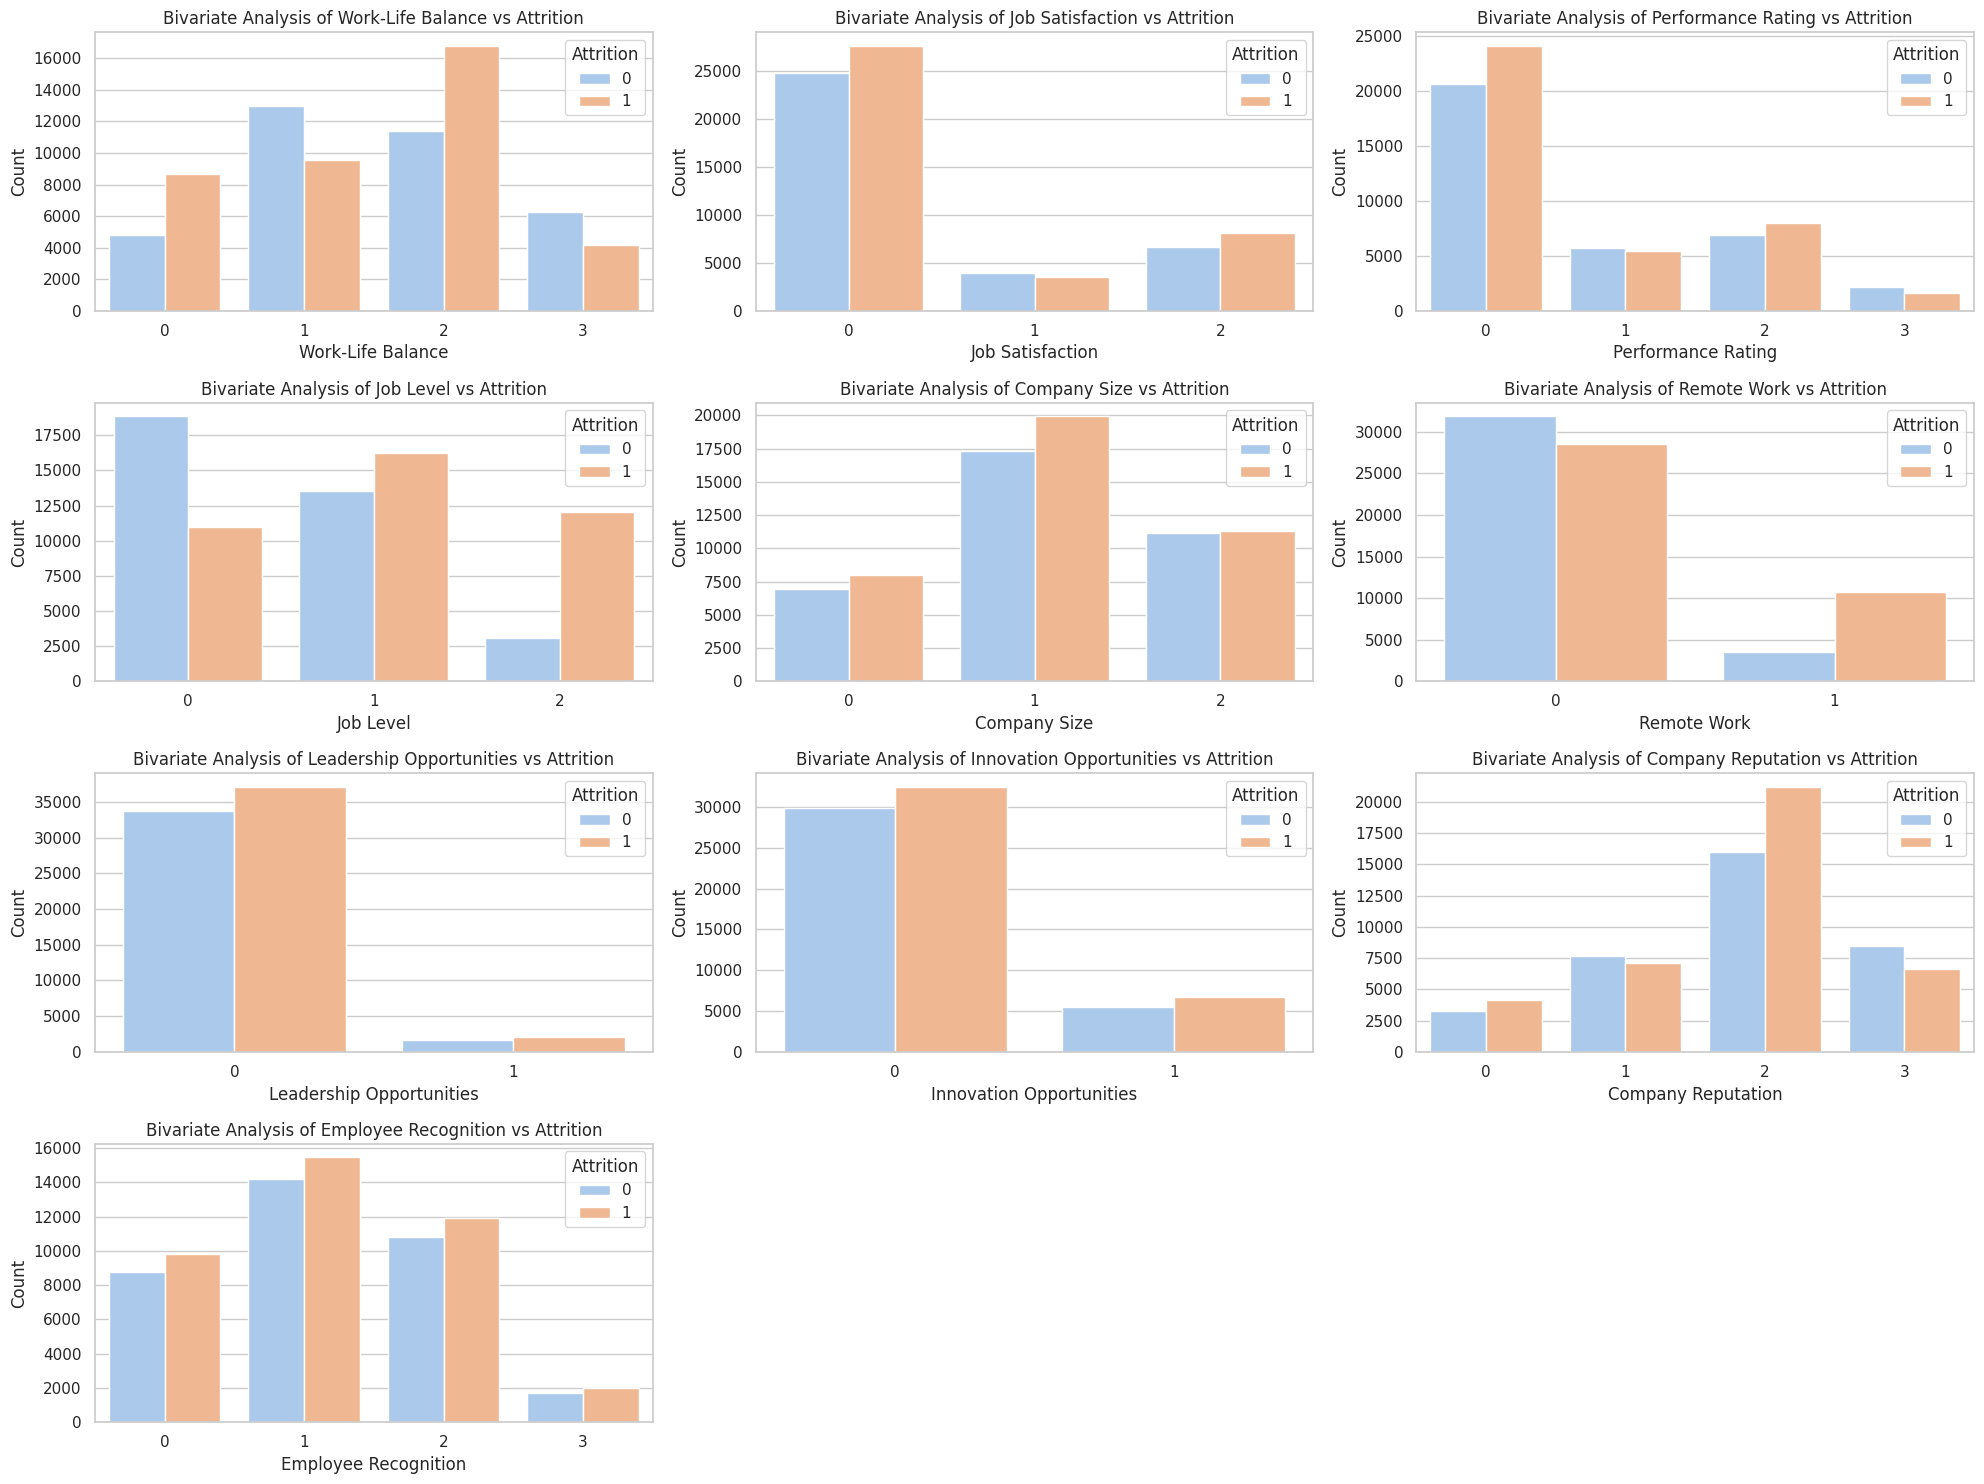

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Manually specify the original categorical columns based on your understanding
original_categorical_columns = [
    'Work-Life Balance',
    'Job Satisfaction',
    'Performance Rating',
    'Job Level',
    'Company Size',
    'Remote Work',
    'Leadership Opportunities',
    'Innovation Opportunities',
    'Company Reputation',
    'Employee Recognition'
]

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot count plots for each categorical column against the target variable
plt.figure(figsize=(20, 15))
for i, column in enumerate(original_categorical_columns, 1):
    if column in X_train.columns:  # Check if the column exists in the DataFrame
        plt.subplot(4, 3, i)  # Adjust the grid size based on the number of columns
        sns.countplot(data=df, x=column, hue='Attrition', palette='pastel')
        plt.title(f'Bivariate Analysis of {column} vs Attrition')
        plt.xlabel(column)
        plt.ylabel('Count')

plt.tight_layout()
plt.show()


## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

Perform univariate analysis on validation data for all the numerical columns.


5.1.1 Select numerical columns from validation data

In [47]:
# Create a validation set from the training data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=42)  # 20% of the original data for validation

In [48]:
# Select numerical columns
# Select numerical columns from the validation set
numerical_columns_val = X_val.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns in Validation Data:", numerical_columns_val)


Numerical Columns in Validation Data: Index(['Age', 'Years at Company', 'Monthly Income', 'Work-Life Balance',
       'Job Satisfaction', 'Performance Rating', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents', 'Job Level',
       'Company Size', 'Company Tenure (In Months)', 'Remote Work',
       'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition'],
      dtype='object')


5.1.2 Plot distribution of numerical columns

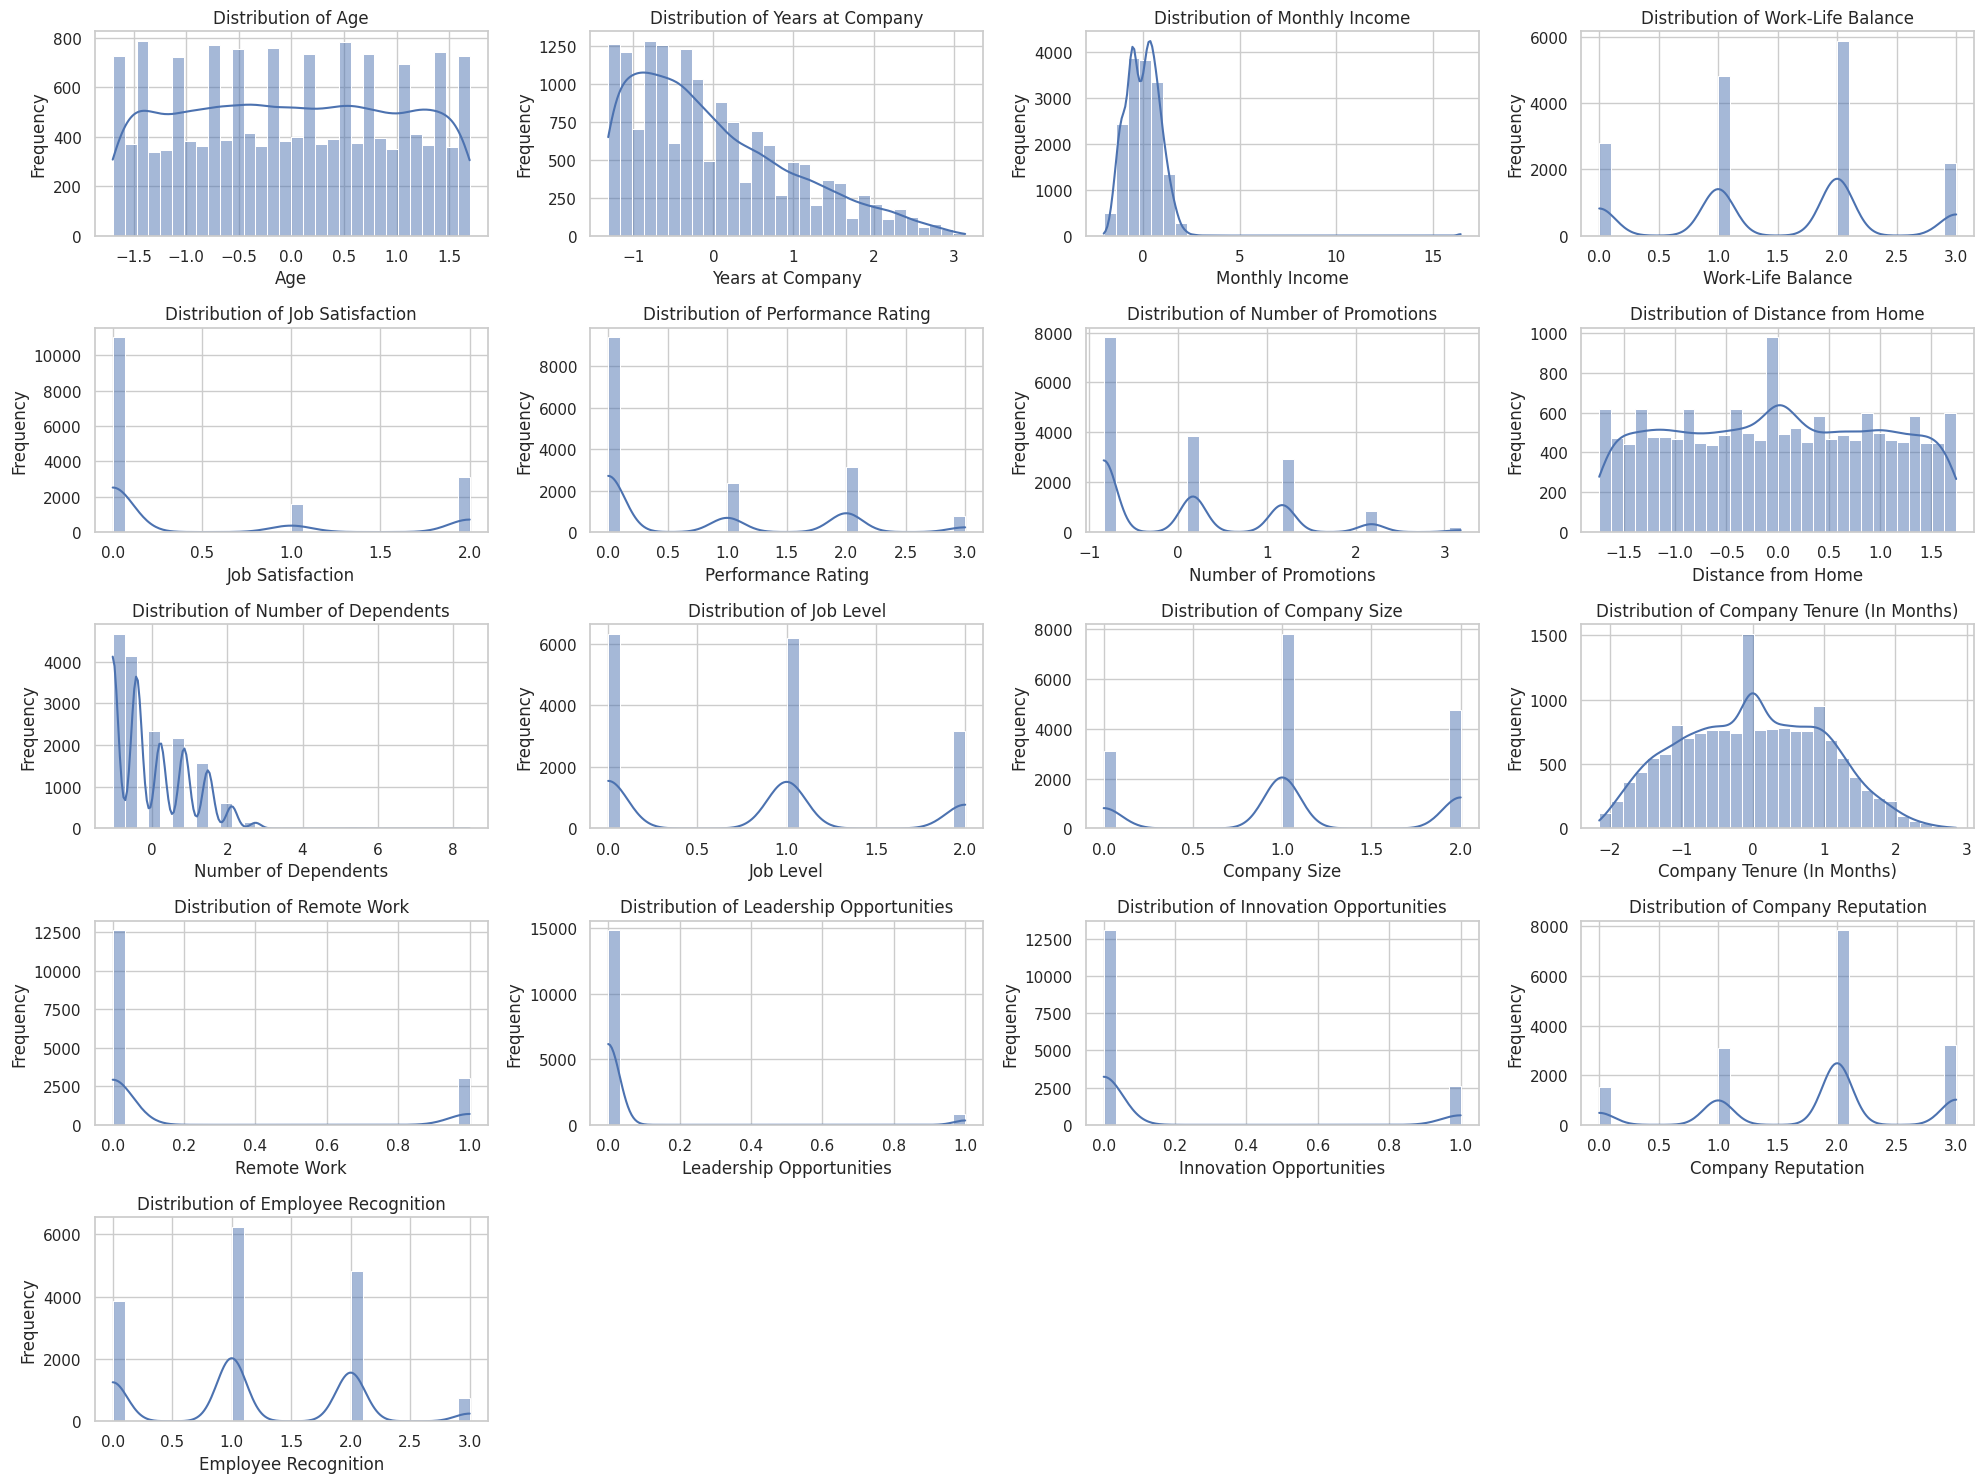

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot histograms for each numerical column in the validation set
plt.figure(figsize=(20, 15))
num_columns = len(numerical_columns_val)  # Get the number of numerical columns
rows = (num_columns // 4) + 1  # Calculate the number of rows needed

for i, column in enumerate(numerical_columns_val, 1):
    plt.subplot(rows, 4, i)  # Adjust the grid size based on the number of columns
    sns.histplot(X_val[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### **5.2 Perform correlation analysis**

Check the correlation among different numerical variables.

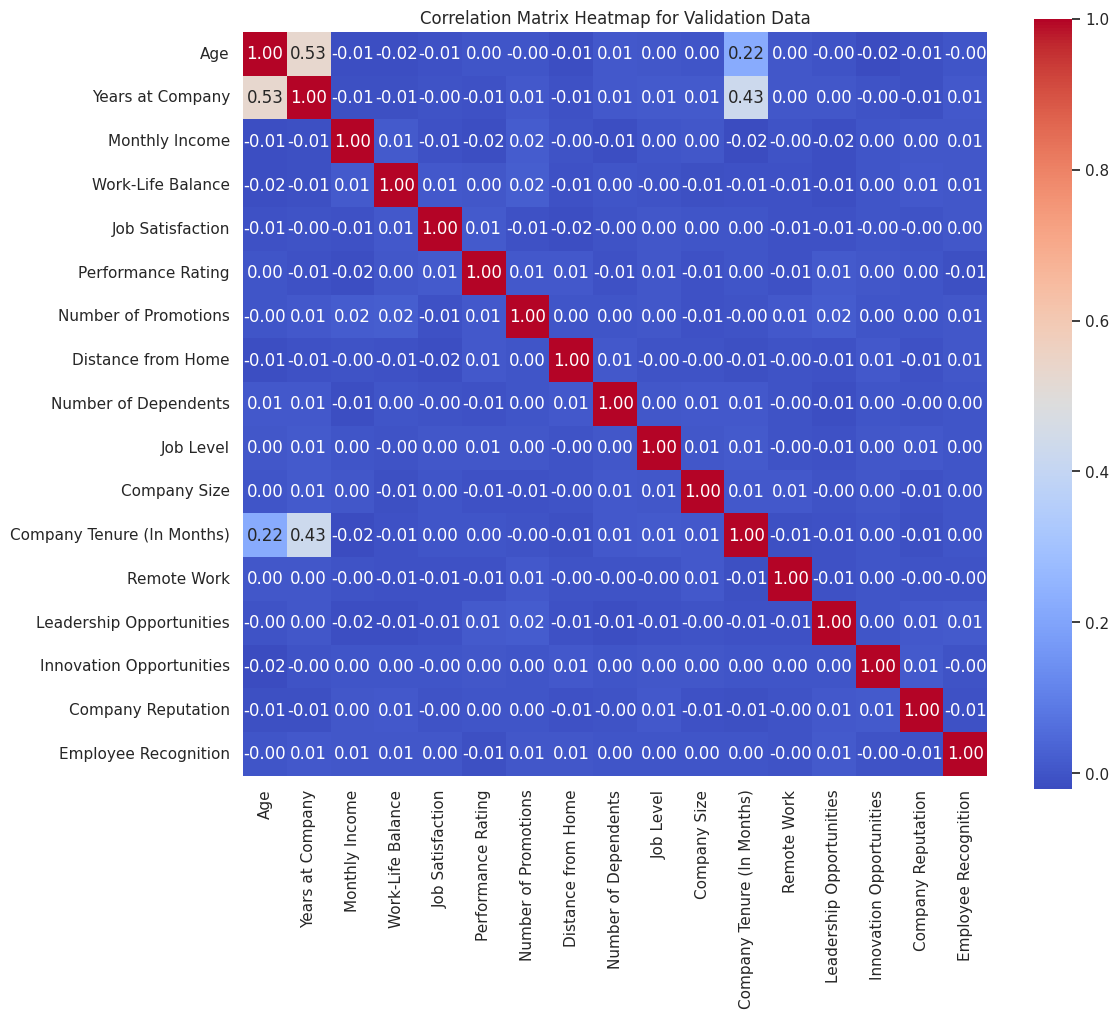

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for the numerical columns in validation data
correlation_matrix_val = X_val[numerical_columns_val].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_val, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix Heatmap for Validation Data')
plt.show()


### **5.3 Check class balance**

Check the distribution of target variable in validation data to check class balance.

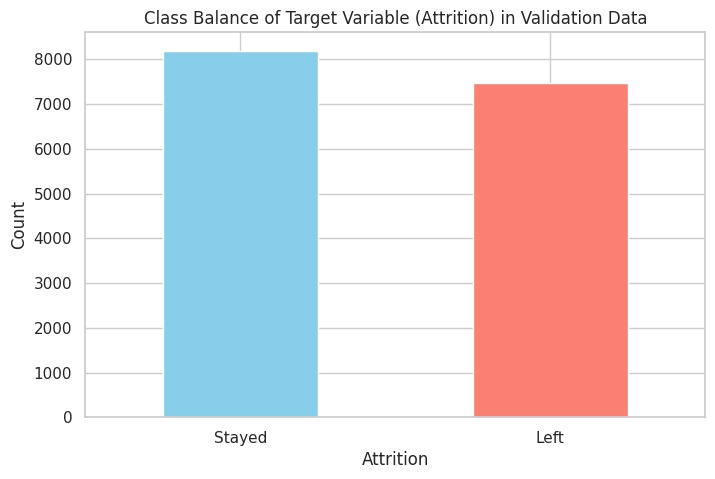

In [53]:
# Plot a bar chart to check class balance
import matplotlib.pyplot as plt

# Count the occurrences of each class in the target variable for validation data
class_counts_val = y_val.value_counts()

# Plot a bar chart to check class balance
plt.figure(figsize=(8, 5))
class_counts_val.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Balance of Target Variable (Attrition) in Validation Data')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Stayed', 'Left'], rotation=0)
plt.show()


### **5.4 Perform bivariate analysis**

Perform bivariate analysis on validation data between all the categorical columns and target variable to analyse how the categorical variables influence the target variable.

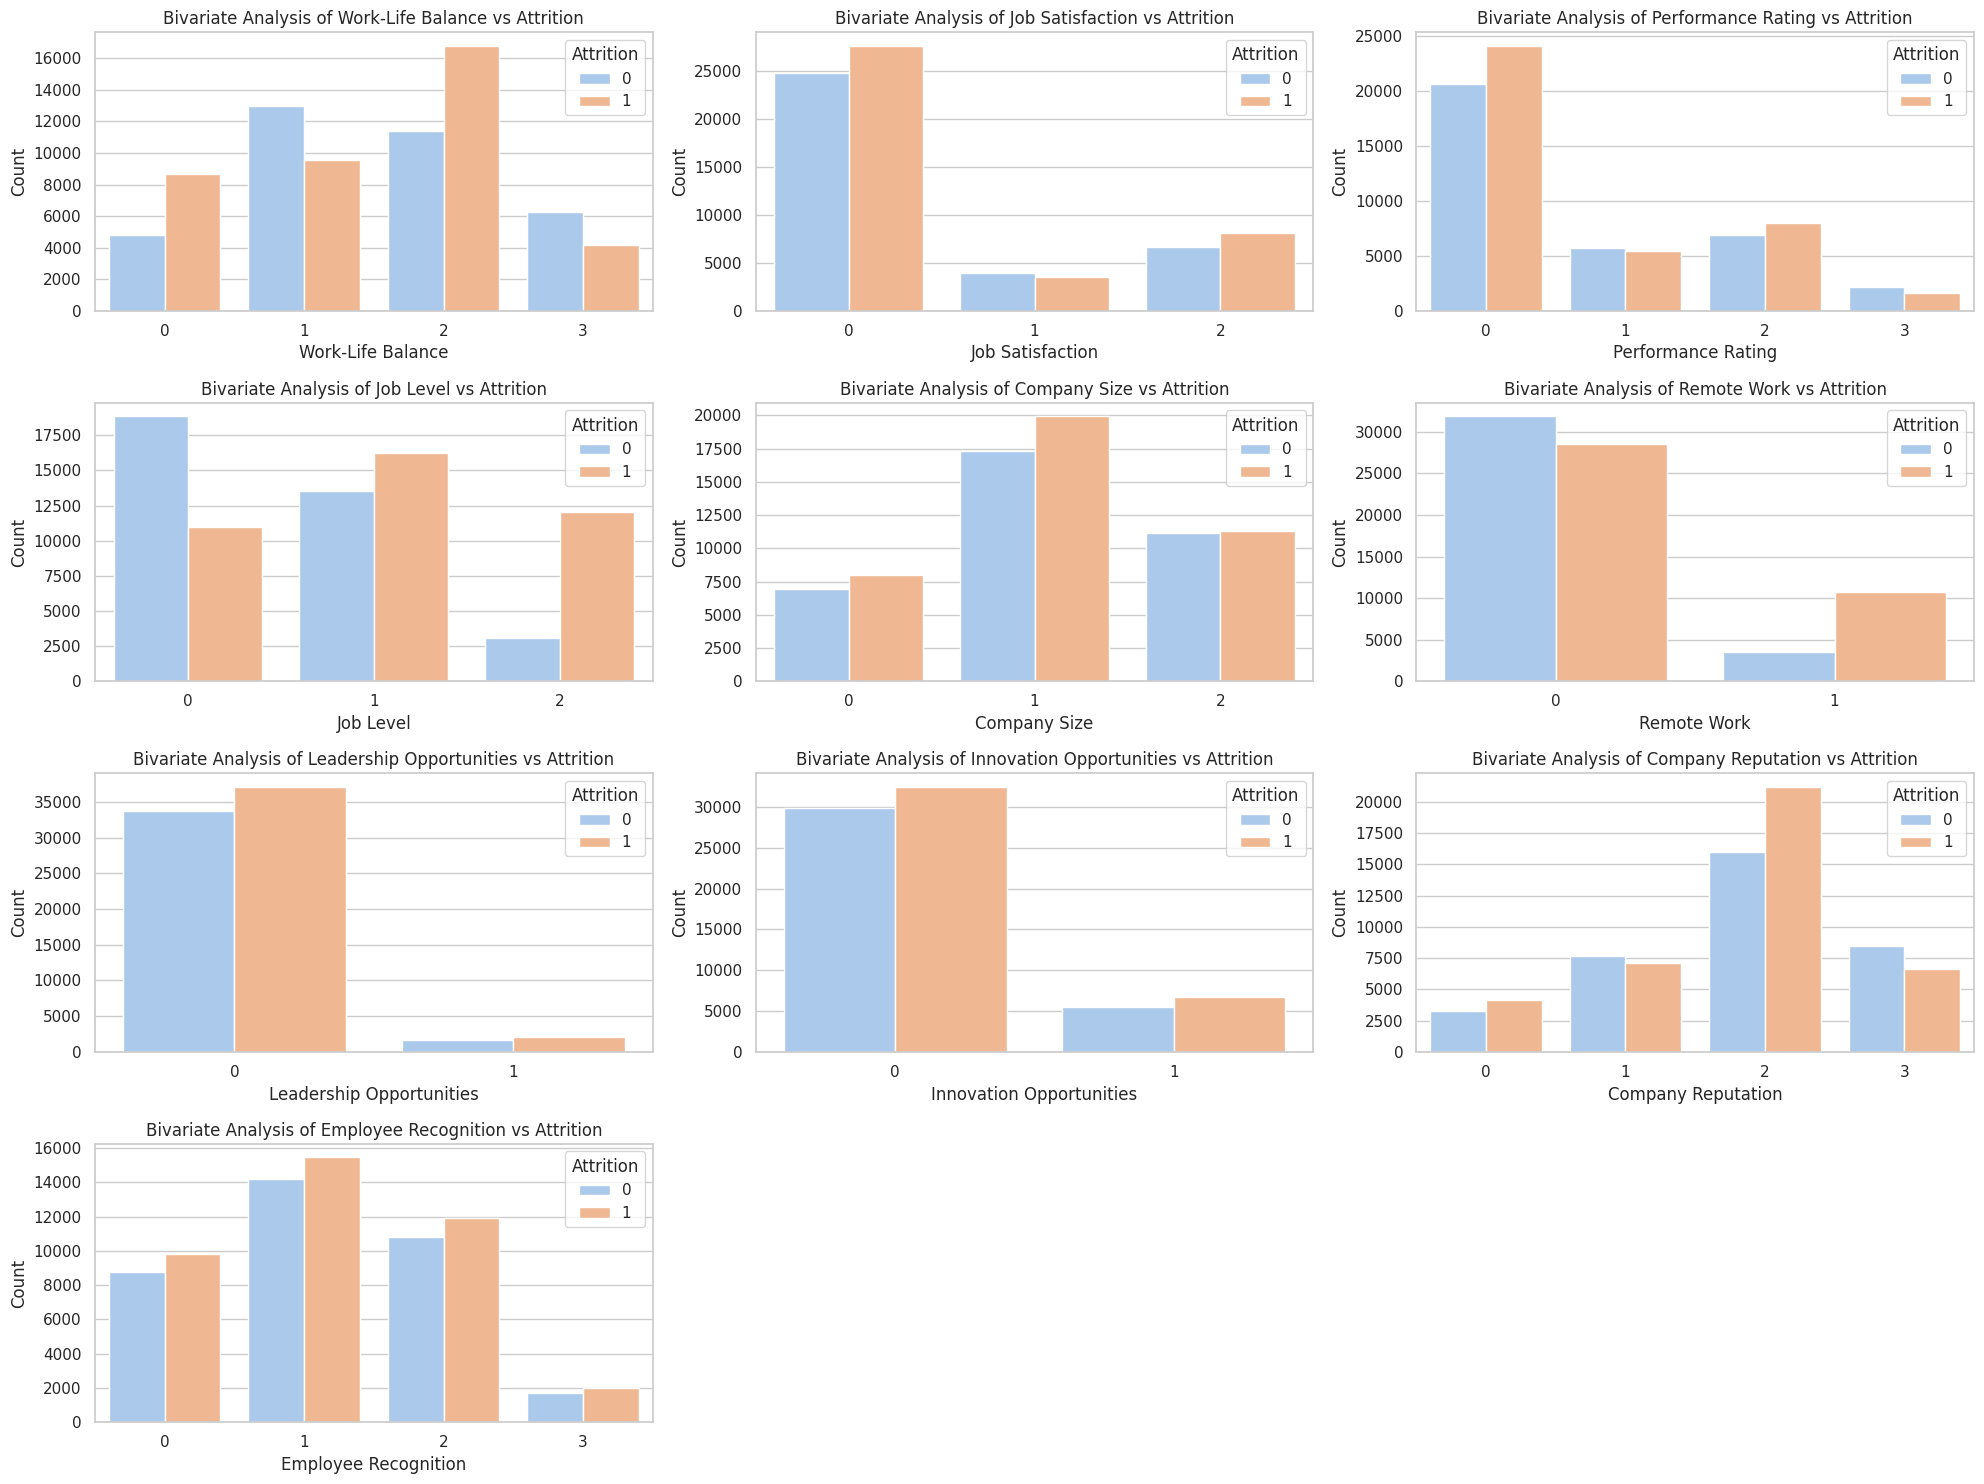

In [54]:
# Plot distribution for each categorical column with target variable
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot count plots for each categorical column against the target variable
plt.figure(figsize=(20, 15))
for i, column in enumerate(original_categorical_columns, 1):
    if column in X_val.columns:  # Check if the column exists in the validation DataFrame
        plt.subplot(4, 3, i)  # Adjust the grid size based on the number of columns
        sns.countplot(data=df, x=column, hue='Attrition', palette='pastel')
        plt.title(f'Bivariate Analysis of {column} vs Attrition')
        plt.xlabel(column)
        plt.ylabel('Count')

plt.tight_layout()
plt.show()


## **6. Feature Engineering** <font color = red>[20 marks]</font>

### **6.1 Dummy variable creation** <font color = red>[15 marks]</font>


The next step is to deal with the categorical variables present in the data.

6.1.1 Identify categorical columns where dummy variables are required <font color="red">[1 Mark]</font>

In [57]:
# Check the categorical columns
# Manually specify original categorical columns based on your understanding
encoded_categorical_columns = [
    'Work-Life Balance',
    'Job Satisfaction',
    'Performance Rating',
    'Job Level',
    'Company Size',
    'Remote Work',
    'Leadership Opportunities',
    'Innovation Opportunities',
    'Company Reputation',
    'Employee Recognition'
]

# Check both types of categorical columns
print("Categorical Columns (Original):", categorical_columns)
print("Categorical Columns (Encoded):", encoded_categorical_columns)


Categorical Columns (Original): Index([], dtype='object')
Categorical Columns (Encoded): ['Work-Life Balance', 'Job Satisfaction', 'Performance Rating', 'Job Level', 'Company Size', 'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities', 'Company Reputation', 'Employee Recognition']


6.1.2 Create dummy variables for independent columns in training set <font color="red">[3 Marks]</font>

In [58]:
# Create dummy variables using the 'get_dummies' for independent columns

# Add the results to the master DataFrame
import pandas as pd

# Assuming 'df' is your master DataFrame and 'encoded_categorical_columns' contains the categorical columns

# Create dummy variables for the specified categorical columns
dummy_df = pd.get_dummies(df[encoded_categorical_columns], drop_first=True)

# Drop the original categorical columns from the master DataFrame
df = df.drop(columns=encoded_categorical_columns)

# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, dummy_df], axis=1)

# Display the first few rows of the updated DataFrame
print(df.head())


        Age  Years at Company  Monthly Income  Number of Promotions  \
0 -0.623179          0.291996       -0.752952              1.172530   
1  1.694277         -1.044428       -0.697490              2.177233   
2 -1.202542         -0.509858        0.313543             -0.836875   
3 -0.209347         -0.777143       -1.292554              0.167828   
4  1.445978          2.252085       -0.972105             -0.836875   

   Distance from Home  Number of Dependents  Company Tenure (In Months)  \
0           -0.994305             -1.049106                    1.332688   
1           -1.029828              0.849807                   -1.389690   
2           -1.385053              0.849807                    0.732164   
3           -0.816693              0.216836                   -0.228676   
4            0.746299             -1.049106                    0.491954   

   Attrition  Work-Life Balance  Job Satisfaction  Performance Rating  \
0          1                  0                 2

Now, drop the original categorical columns and check the DataFrame

In [59]:

# Drop the original categorical columns from the master DataFrame
df = df.drop(columns=encoded_categorical_columns)

# Display the first few rows of the updated DataFrame
print(df.head())

# Optionally, check the shape of the updated DataFrame
print("Updated DataFrame shape:", df.shape)


        Age  Years at Company  Monthly Income  Number of Promotions  \
0 -0.623179          0.291996       -0.752952              1.172530   
1  1.694277         -1.044428       -0.697490              2.177233   
2 -1.202542         -0.509858        0.313543             -0.836875   
3 -0.209347         -0.777143       -1.292554              0.167828   
4  1.445978          2.252085       -0.972105             -0.836875   

   Distance from Home  Number of Dependents  Company Tenure (In Months)  \
0           -0.994305             -1.049106                    1.332688   
1           -1.029828              0.849807                   -1.389690   
2           -1.385053              0.849807                    0.732164   
3           -0.816693              0.216836                   -0.228676   
4            0.746299             -1.049106                    0.491954   

   Attrition  
0          1  
1          1  
2          1  
3          1  
4          1  
Updated DataFrame shape: (74610,

6.1.3 Create dummy variables for independent columns in validation set <font color="red">[3 Marks]</font>

Now, drop the original categorical columns and check the DataFrame

In [63]:
# Drop categorical columns and check the DataFrame
# Create DataFrame for dependent column in training set
df_train_attrition = pd.DataFrame(y_train, columns=['Attrition'])

# Create DataFrame for dependent column in validation set
df_val_attrition = pd.DataFrame(y_val, columns=['Attrition'])

# Display the first few rows of each DataFrame
print("Training Set Attrition DataFrame:")
print(df_train_attrition.head())

print("\nValidation Set Attrition DataFrame:")
print(df_val_attrition.head())


Training Set Attrition DataFrame:
       Attrition
48437          1
62806          0
18515          1
27266          0
64363          0

Validation Set Attrition DataFrame:
       Attrition
17821          1
53181          1
12870          0
3506           0
4308           1


6.1.4 Create DataFrame for dependent column in both training and validation set <font color = "red">[1 Mark]</font>

In [64]:
# Convert y_train and y_validation to DataFrame to create dummy variables
import pandas as pd

# Convert y_train to DataFrame
df_train_attrition = pd.DataFrame(y_train, columns=['Attrition'])

# Convert y_val to DataFrame
df_val_attrition = pd.DataFrame(y_val, columns=['Attrition'])

# Display the first few rows of each DataFrame
print("Training Set Attrition DataFrame:")
print(df_train_attrition.head())

print("\nValidation Set Attrition DataFrame:")
print(df_val_attrition.head())


Training Set Attrition DataFrame:
       Attrition
48437          1
62806          0
18515          1
27266          0
64363          0

Validation Set Attrition DataFrame:
       Attrition
17821          1
53181          1
12870          0
3506           0
4308           1


6.1.5 Create dummy variables for dependent column in training set <font color="red">[3 Marks]</font>

In [65]:
# Create dummy variables using the 'get_dummies' for dependent column
# Create dummy variables for the dependent column in training set
dummy_train_attrition = pd.get_dummies(df_train_attrition, drop_first=True)

# Create dummy variables for the dependent column in validation set
dummy_val_attrition = pd.get_dummies(df_val_attrition, drop_first=True)

# Display the first few rows of the dummy DataFrames
print("Dummy Variables for Training Set Attrition:")
print(dummy_train_attrition.head())

print("\nDummy Variables for Validation Set Attrition:")
print(dummy_val_attrition.head())


Dummy Variables for Training Set Attrition:
       Attrition
48437          1
62806          0
18515          1
27266          0
64363          0

Dummy Variables for Validation Set Attrition:
       Attrition
17821          1
53181          1
12870          0
3506           0
4308           1


6.1.6 Create dummy variable for dependent column in validation set <font color = "red">[3 Marks]</font>

In [66]:
# Create dummy variables using the 'get_dummies' for dependent column
import pandas as pd

# Assuming df_train_attrition and df_val_attrition are already created

# Create dummy variables for the dependent column in training set
dummy_train_attrition = pd.get_dummies(df_train_attrition, drop_first=True)

# Create dummy variables for the dependent column in validation set
dummy_val_attrition = pd.get_dummies(df_val_attrition, drop_first=True)

# Display the first few rows of the dummy DataFrames
print("Dummy Variables for Training Set Attrition:")
print(dummy_train_attrition.head())

print("\nDummy Variables for Validation Set Attrition:")
print(dummy_val_attrition.head())


Dummy Variables for Training Set Attrition:
       Attrition
48437          1
62806          0
18515          1
27266          0
64363          0

Dummy Variables for Validation Set Attrition:
       Attrition
17821          1
53181          1
12870          0
3506           0
4308           1


6.1.7 Drop redundant columns <font color="red">[1 Mark]</font>

In [67]:
# Drop redundant columns from both train and validation
# List of redundant columns to drop (original Attrition column)
redundant_columns = ['Attrition']

# Drop redundant columns from the training DataFrame
df_train_attrition = df_train_attrition.drop(columns=redundant_columns, errors='ignore')

# Drop redundant columns from the validation DataFrame
df_val_attrition = df_val_attrition.drop(columns=redundant_columns, errors='ignore')

# Display the first few rows of the updated DataFrames
print("Updated Training Set Attrition DataFrame:")
print(df_train_attrition.head())

print("\nUpdated Validation Set Attrition DataFrame:")
print(df_val_attrition.head())


Updated Training Set Attrition DataFrame:
Empty DataFrame
Columns: []
Index: [48437, 62806, 18515, 27266, 64363]

Updated Validation Set Attrition DataFrame:
Empty DataFrame
Columns: []
Index: [17821, 53181, 12870, 3506, 4308]


### **6.2 Feature scaling** <font color = red>[5 marks]</font>

Apply feature scaling to the numeric columns to bring them to a common range and ensure consistent scaling.

6.2.1 Import required libraries <font color="red">[1 Mark]</font>

In [ ]:
# Import the necessary scaling tool from scikit-learn


6.2.2 Scale the numerical features <font color="red">[4 Marks]</font>

In [ ]:
# Scale the numeric features present in the training set

# Scale the numerical features present in the validation set


## **7. Model Building** <font color = red>[40 marks]</font>

### **7.1 Feature selection** <font color = red>[5 marks]</font>

As there are a lot of variables present in the data, Recursive Feature Elimination (RFE) will be used to select the most influential features for building the model.

7.1.1 Import required libraries <font color="red">[1 Mark]</font>

In [68]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression

7.1.2 Import RFE  and select 15 variables <font color="red">[3 Mark]</font>

In [69]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression object
logistic_model = LogisticRegression(max_iter=1000)

# Initialize RFE with the logistic regression model and specify the number of features to select
rfe = RFE(estimator=logistic_model, n_features_to_select=15)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

# Display the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['Age', 'Years at Company', 'Monthly Income', 'Work-Life Balance',
       'Job Satisfaction', 'Performance Rating', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents', 'Job Level',
       'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation'],
      dtype='object')


7.1.3 Store the selected features <font color="red">[1 Mark]</font>




In [70]:
# Put columns selected by RFE into variable 'col'
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression object
logistic_model = LogisticRegression(max_iter=1000)

# Initialize RFE with the logistic regression model and specify the number of features to select
rfe = RFE(estimator=logistic_model, n_features_to_select=15)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the selected features and store them in the variable 'col'
col = X_train.columns[rfe.support_]

# Display the selected features stored in 'col'
print("Selected Features stored in 'col':")
print(col)


Selected Features stored in 'col':
Index(['Age', 'Years at Company', 'Monthly Income', 'Work-Life Balance',
       'Job Satisfaction', 'Performance Rating', 'Number of Promotions',
       'Distance from Home', 'Number of Dependents', 'Job Level',
       'Company Size', 'Remote Work', 'Leadership Opportunities',
       'Innovation Opportunities', 'Company Reputation'],
      dtype='object')


### **7.2 Building Logistic Regression Model** <font color = red>[20 marks]</font>

Now that you have selected the variables through RFE, use these features to build a logistic regression model with statsmodels. This will allow you to assess the statistical aspects, such as p-values and VIFs, which are important for checking multicollinearity and ensuring that the predictors are not highly correlated with each other, as this could distort the model's coefficients.

7.2.1 Select relevant columns on training set <font color="red">[1 Mark]</font>

In [71]:
# Select only the columns selected by RFE
import statsmodels.api as sm

# Select relevant columns from the training set based on the selected features
X_train_selected = X_train[col]

# Add a constant to the model (intercept)
X_train_selected = sm.add_constant(X_train_selected)

# Display the first few rows of the selected training set
print("Selected Features from Training Set:")
print(X_train_selected.head())


Selected Features from Training Set:
       const       Age  Years at Company  Monthly Income  Work-Life Balance  \
48437    1.0  1.528744          2.608464       -0.929353                  2   
62806    1.0  1.363212          1.272041        0.810778                  2   
18515    1.0 -0.871477         -0.420763       -0.919724                  3   
27266    1.0  1.197679          2.608464        1.570304                  3   
64363    1.0 -0.457646         -0.598953       -1.044900                  2   

       Job Satisfaction  Performance Rating  Number of Promotions  \
48437                 1                   2             -0.836875   
62806                 0                   0              1.172530   
18515                 0                   0             -0.836875   
27266                 0                   0             -0.836875   
64363                 0                   2             -0.836875   

       Distance from Home  Number of Dependents  Job Level  Company Size 

7.2.2 Add constant to training set <font color = "red">[1 Mark]</font>

In [72]:
import statsmodels.api as sm

# Assuming 'col' contains the selected features from RFE
# Select relevant columns from the training set based on the selected features
X_train_selected = X_train[col]

# Add a constant to the model (intercept)
X_train_selected = sm.add_constant(X_train_selected)

# Display the first few rows of the updated training set
print("Training Set with Constant Added:")
print(X_train_selected.head())



Training Set with Constant Added:
       const       Age  Years at Company  Monthly Income  Work-Life Balance  \
48437    1.0  1.528744          2.608464       -0.929353                  2   
62806    1.0  1.363212          1.272041        0.810778                  2   
18515    1.0 -0.871477         -0.420763       -0.919724                  3   
27266    1.0  1.197679          2.608464        1.570304                  3   
64363    1.0 -0.457646         -0.598953       -1.044900                  2   

       Job Satisfaction  Performance Rating  Number of Promotions  \
48437                 1                   2             -0.836875   
62806                 0                   0              1.172530   
18515                 0                   0             -0.836875   
27266                 0                   0             -0.836875   
64363                 0                   2             -0.836875   

       Distance from Home  Number of Dependents  Job Level  Company Size  \


7.2.3 Fit logistic regression model <font color="red">[3 Marks]</font>

In [73]:
# Fit a logistic regression model on X_train after adding a constant and output the summary
import statsmodels.api as sm

# Fit the logistic regression model
logistic_model = sm.Logit(y_train, X_train_selected)
result = logistic_model.fit()

# Output the summary of the model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.592395
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                36558
Model:                          Logit   Df Residuals:                    36542
Method:                           MLE   Df Model:                           15
Date:                Tue, 27 May 2025   Pseudo R-squ.:                  0.1433
Time:                        06:07:42   Log-Likelihood:                -21657.
converged:                       True   LL-Null:                       -25279.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.3763      0.041     -9.209      0.000      -0.456

**Model Interpretation**

The output summary table  will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e,  an increase in the value of feature would decrease the odds of the event occurring.



7.2.4 Evaluate VIF of features <font color="red">[3 Marks]</font>

In [ ]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
# Make a VIF DataFrame for all the variables present
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_train_selected.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_selected.values, i) for i in range(X_train_selected.shape[1])]

# Display the VIF DataFrame
print("VIF DataFrame:")
print(vif_data)


VIF DataFrame:
                     Feature        VIF
0                      const  12.662784
1                        Age   1.409881
2           Years at Company   1.410063
3             Monthly Income   1.000639
4          Work-Life Balance   1.000482
5           Job Satisfaction   1.000730
6         Performance Rating   1.000486
7       Number of Promotions   1.000341
8         Distance from Home   1.000490
9       Number of Dependents   1.000304
10                 Job Level   1.000282
11              Company Size   1.000390
12               Remote Work   1.000280
13  Leadership Opportunities   1.000407
14  Innovation Opportunities   1.000475
15        Company Reputation   1.000486


Proceed to the next step if p-values and VIFs are within acceptable ranges.  If you observe high p-values or VIFs, create new cells to drop the features and retrain the model.

7.2.5 Make predictions on training set <font color = "red">[2 Marks]</font>

In [75]:
# Predict the probabilities on the training set
# Predict the probabilities on the training set
predicted_probabilities = result.predict(X_train_selected)

# Display the first few predicted probabilities
print("Predicted Probabilities on the Training Set:")
print(predicted_probabilities.head())


Predicted Probabilities on the Training Set:
48437    0.884640
62806    0.411495
18515    0.236562
27266    0.528459
64363    0.316385
dtype: float64


7.2.6 Format the prediction output <font color="red">[1 Mark]</font>

In [76]:
# Reshape it into an array
import numpy as np

# Reshape the predicted probabilities into a 1D array
predicted_probabilities_array = np.array(predicted_probabilities).reshape(-1)

# Display the reshaped array
print("Reshaped Predicted Probabilities Array:")
print(predicted_probabilities_array)


Reshaped Predicted Probabilities Array:
[0.88463992 0.41149528 0.23656189 ... 0.87132919 0.46762914 0.64797894]


7.2.7 Create a DataFrame with the actual stayed flag and the predicted probabilities <font color="red">[1 Mark]</font>

In [77]:
# Create a new DataFrame containing the actual stayed flag and the probabilities predicted by the model
# Create a new DataFrame containing the actual stayed flag and the predicted probabilities
results_df = pd.DataFrame({
    'Actual Attrition': y_train,
    'Predicted Probability': predicted_probabilities
})

# Display the first few rows of the new DataFrame
print("New DataFrame with Actual and Predicted Probabilities:")
print(results_df.head())


New DataFrame with Actual and Predicted Probabilities:
       Actual Attrition  Predicted Probability
48437                 1               0.884640
62806                 0               0.411495
18515                 1               0.236562
27266                 0               0.528459
64363                 0               0.316385


7.2.8 Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0 <font color = "red">[1 Mark]</font>

In [78]:
# Create a new column 'Predicted' with 1 if predicted probabilities are greater than 0.5 else 0
# Create a new column 'Predicted' based on the predicted probabilities
results_df['Predicted'] = (results_df['Predicted Probability'] > 0.5).astype(int)

# Display the first few rows of the updated DataFrame
print("Updated DataFrame with Predicted Column:")
print(results_df.head())


Updated DataFrame with Predicted Column:
       Actual Attrition  Predicted Probability  Predicted
48437                 1               0.884640          1
62806                 0               0.411495          0
18515                 1               0.236562          0
27266                 0               0.528459          1
64363                 0               0.316385          0


**Evaluation of performance of Model**

Evaluate the performance of the model based on the predictions made on the training set.


7.2.9 Check the accuracy of the model based on the predictions made on the training set <font color = "red">[1 Mark]</font>

In [79]:
# Import metrics from sklearn for evaluation
from sklearn import metrics
# Calculate the accuracy of the model
accuracy = (results_df['Actual Attrition'] == results_df['Predicted']).mean()

# Display the overall accuracy
print(f"Overall Accuracy of the Model on the Training Set: {accuracy:.2f}")



Overall Accuracy of the Model on the Training Set: 0.68


7.2.10 Create a confusion matrix based on the predictions made on the training set <font color="red">[1 mark]</font>

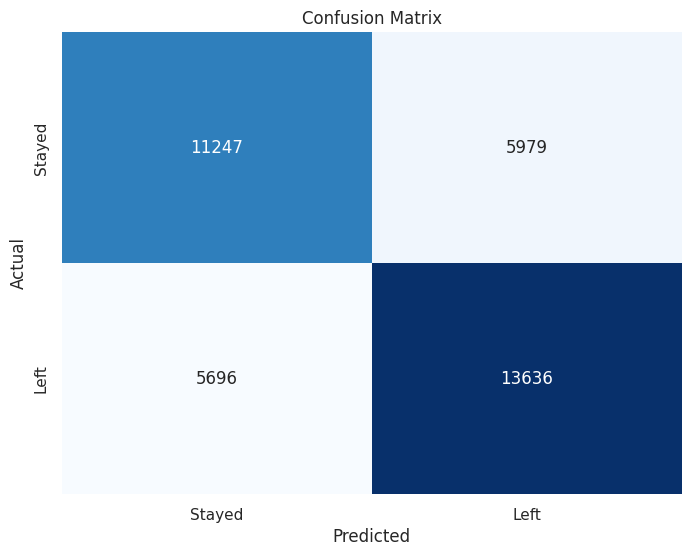

In [80]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create the confusion matrix
cm = confusion_matrix(results_df['Actual Attrition'], results_df['Predicted'])

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


7.2.11 Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [81]:
# Create variables for true positive, true negative, false positive and false negative
# Create the confusion matrix
cm = confusion_matrix(results_df['Actual Attrition'], results_df['Predicted'])

# Extract values from the confusion matrix
true_negative = cm[0, 0]  # Correctly predicted stayed
false_positive = cm[0, 1]  # Incorrectly predicted left
false_negative = cm[1, 0]  # Incorrectly predicted stayed
true_positive = cm[1, 1]  # Correctly predicted left

# Display the values
print(f"True Positive (TP): {true_positive}")
print(f"True Negative (TN): {true_negative}")
print(f"False Positive (FP): {false_positive}")
print(f"False Negative (FN): {false_negative}")


True Positive (TP): 13636
True Negative (TN): 11247
False Positive (FP): 5979
False Negative (FN): 5696


7.2.12 Calculate sensitivity and specificity of model  <font color="red">[2 Marks]</font>

In [82]:
# Calculate sensitivity
sensitivity = true_positive / (true_positive + false_negative)

# Display the sensitivity
print(f"Sensitivity (Recall): {sensitivity:.2f}")



Sensitivity (Recall): 0.71


In [83]:
# Calculate specificity
specificity = true_negative / (true_negative + false_positive)

# Display the specificity
print(f"Specificity: {specificity:.2f}")


Specificity: 0.65


7.2.13 Calculate precision and recall of model <font color="red">[2 Marks]</font>

In [87]:
# Calculate precision
precision = true_positive / (true_positive + false_positive)
print(f"Precision: {precision:.2f}")

Precision: 0.70


In [88]:
# Calculate recall (sensitivity)
recall = true_positive / (true_positive + false_negative)
print(f"Recall (Sensitivity): {recall:.2f}")

Recall (Sensitivity): 0.71


### **7.3 Find the optimal cutoff** <font color = red>[15 marks]</font>

Find the optimal cutoff to improve model performance. While a default threshold of 0.5 was used for initial evaluation, optimising this threshold can enhance the model's performance.

First, plot the ROC curve and check AUC.



7.3.1 Plot ROC curve <font color="red">[3 Marks]</font>

In [89]:
# Define ROC function
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_scores):
    """
    Function to plot the ROC curve and calculate the AUC.

    Parameters:
    y_true: array-like, true binary labels.
    y_scores: array-like, predicted probabilities of the positive class.
    """
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()



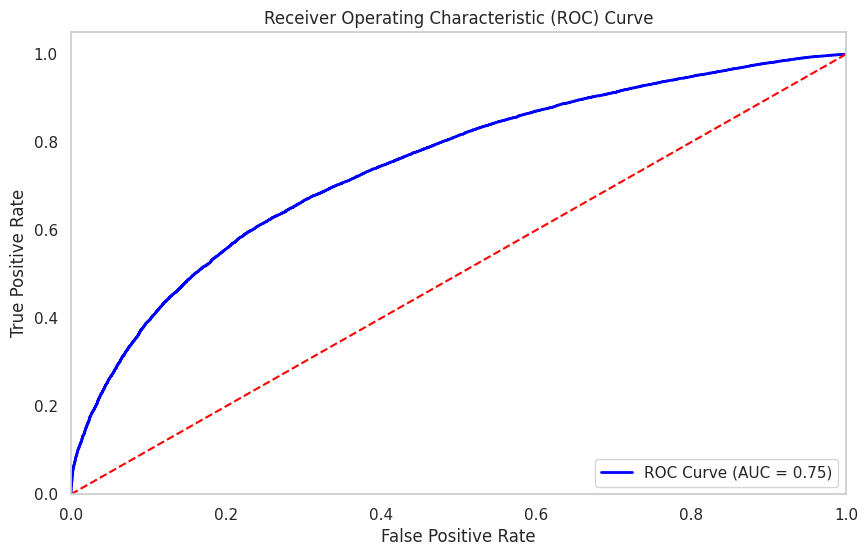

In [90]:
# Call the ROC function
# Call the ROC function using the actual labels and predicted probabilities
plot_roc_curve(y_train, predicted_probabilities)


**Sensitivity and Specificity tradeoff**

Check sensitivity and specificity tradeoff to find the optimal cutoff point.

7.3.2 Predict on training set at various probability cutoffs <font color="red">[1 Mark]</font>

In [91]:
# Predict on training data by creating columns with different probability cutoffs to explore the impact of cutoff on model performance
# Define different probability cutoffs
cutoffs = [0.3, 0.4, 0.5, 0.6, 0.7]

# Create a new DataFrame to store the results
results_df_cutoffs = results_df.copy()

# Create columns based on different probability cutoffs
for cutoff in cutoffs:
    results_df_cutoffs[f'Predicted (Cutoff {cutoff})'] = (results_df_cutoffs['Predicted Probability'] > cutoff).astype(int)

# Display the first few rows of the updated DataFrame with cutoff predictions
print("Updated DataFrame with Different Cutoff Predictions:")
print(results_df_cutoffs.head())


Updated DataFrame with Different Cutoff Predictions:
       Actual Attrition  Predicted Probability  Predicted  \
48437                 1               0.884640          1   
62806                 0               0.411495          0   
18515                 1               0.236562          0   
27266                 0               0.528459          1   
64363                 0               0.316385          0   

       Predicted (Cutoff 0.3)  Predicted (Cutoff 0.4)  Predicted (Cutoff 0.5)  \
48437                       1                       1                       1   
62806                       1                       1                       0   
18515                       0                       0                       0   
27266                       1                       1                       1   
64363                       1                       0                       0   

       Predicted (Cutoff 0.6)  Predicted (Cutoff 0.7)  
48437                       1        

7.3.3 Plot for accuracy, sensitivity, specificity at different probability cutoffs <font color="red">[2 Marks]</font>

In [92]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
# Initialize lists to store the metrics
metrics = []

# Calculate metrics for each cutoff
for cutoff in cutoffs:
    # Create predictions based on the cutoff
    predictions = (results_df['Predicted Probability'] > cutoff).astype(int)

    # Calculate true positives, true negatives, false positives, and false negatives
    tp = ((results_df['Actual Attrition'] == 1) & (predictions == 1)).sum()
    tn = ((results_df['Actual Attrition'] == 0) & (predictions == 0)).sum()
    fp = ((results_df['Actual Attrition'] == 0) & (predictions == 1)).sum()
    fn = ((results_df['Actual Attrition'] == 1) & (predictions == 0)).sum()

    # Calculate accuracy, sensitivity, and specificity
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Append the metrics to the list
    metrics.append({
        'Cutoff': cutoff,
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity
    })

# Create a DataFrame from the metrics
metrics_df = pd.DataFrame(metrics)

# Display the metrics DataFrame
print("Metrics DataFrame at Different Cutoffs:")
print(metrics_df)


Metrics DataFrame at Different Cutoffs:
   Cutoff  Accuracy  Sensitivity  Specificity
0     0.3  0.623721     0.913149     0.298909
1     0.4  0.665600     0.822264     0.489783
2     0.5  0.680644     0.705359     0.652908
3     0.6  0.672165     0.559694     0.798386
4     0.7  0.632885     0.395872     0.898874


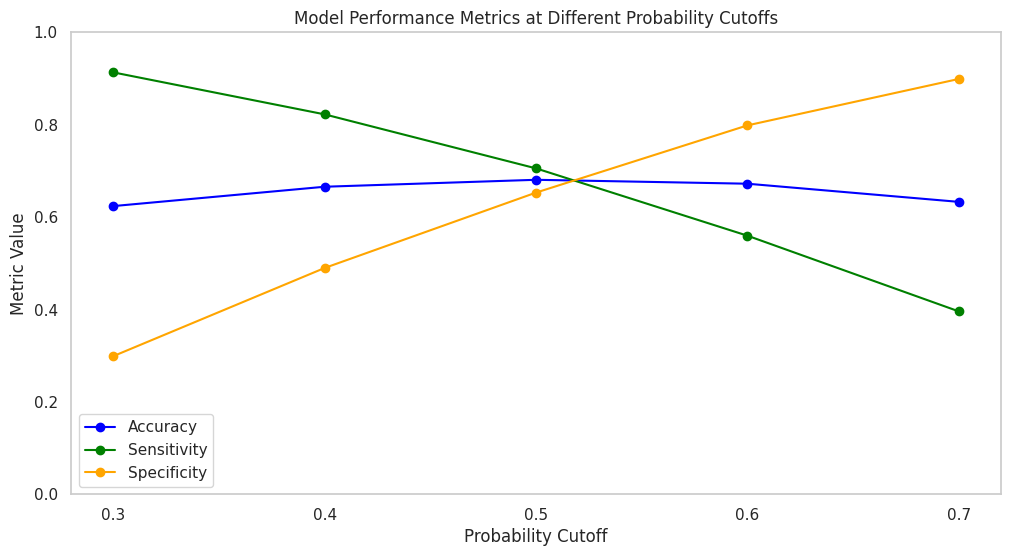

In [93]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
import matplotlib.pyplot as plt

# Plotting the metrics
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.plot(metrics_df['Cutoff'], metrics_df['Accuracy'], marker='o', label='Accuracy', color='blue')

# Plot sensitivity
plt.plot(metrics_df['Cutoff'], metrics_df['Sensitivity'], marker='o', label='Sensitivity', color='green')

# Plot specificity
plt.plot(metrics_df['Cutoff'], metrics_df['Specificity'], marker='o', label='Specificity', color='orange')

# Adding labels and title
plt.title('Model Performance Metrics at Different Probability Cutoffs')
plt.xlabel('Probability Cutoff')
plt.ylabel('Metric Value')
plt.xticks(cutoffs)  # Set x-ticks to the cutoff values
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.legend()
plt.grid()
plt.show()


7.3.4 Create a column for final prediction based on the optimal cutoff <font color="red">[2 Marks]</font>

In [94]:
# Create a column for final prediction based on the optimal cutoff
# Define the optimal cutoff (you can change this to your desired value)
optimal_cutoff = 0.5

# Create a final prediction column based on the optimal cutoff
results_df['Final Prediction'] = (results_df['Predicted Probability'] > optimal_cutoff).astype(int)

# Display the first few rows of the updated DataFrame
print("Updated DataFrame with Final Prediction Column:")
print(results_df.head())


Updated DataFrame with Final Prediction Column:
       Actual Attrition  Predicted Probability  Predicted  Final Prediction
48437                 1               0.884640          1                 1
62806                 0               0.411495          0                 0
18515                 1               0.236562          0                 0
27266                 0               0.528459          1                 1
64363                 0               0.316385          0                 0


7.3.5 Calculate model's accuracy <font color="red">[1Mark]</font>

In [95]:
# Calculate the accuracy
# Calculate the accuracy of the final predictions
final_accuracy = (results_df['Actual Attrition'] == results_df['Final Prediction']).mean()

# Display the accuracy
print(f"Accuracy of the Model with Final Predictions: {final_accuracy:.2f}")


Accuracy of the Model with Final Predictions: 0.68


7.3.6 Create confusion matrix <font color="red">[1Mark]</font>

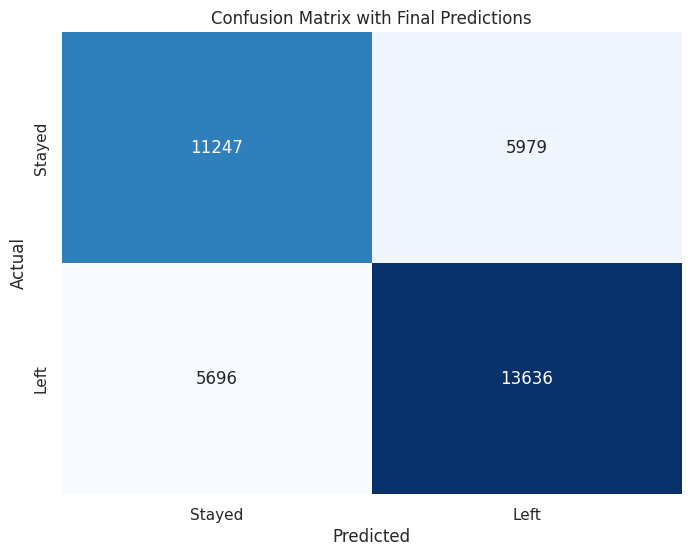

In [96]:
# Create the confusion matrix once again
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix using the actual values and final predictions
cm_final = confusion_matrix(results_df['Actual Attrition'], results_df['Final Prediction'])

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title('Confusion Matrix with Final Predictions')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


7.3.7 Create variables for true positive, true negative, false positive and false negative <font color="red">[1Mark]</font>

In [97]:
# Create variables for true positive, true negative, false positive and false negative
# Create the confusion matrix using the actual values and final predictions
cm_final = confusion_matrix(results_df['Actual Attrition'], results_df['Final Prediction'])

# Extract values from the confusion matrix
true_negative = cm_final[0, 0]  # Correctly predicted stayed
false_positive = cm_final[0, 1]  # Incorrectly predicted left
false_negative = cm_final[1, 0]  # Incorrectly predicted stayed
true_positive = cm_final[1, 1]  # Correctly predicted left

# Display the values
print(f"True Positive (TP): {true_positive}")
print(f"True Negative (TN): {true_negative}")
print(f"False Positive (FP): {false_positive}")
print(f"False Negative (FN): {false_negative}")


True Positive (TP): 13636
True Negative (TN): 11247
False Positive (FP): 5979
False Negative (FN): 5696


7.3.8 Calculate sensitivity and specificity of the model <font color="red">[1Mark]</font>

In [98]:
# Calculate sensitivity
sensitivity = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

# Calculate specificity
specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0

# Display the sensitivity and specificity
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")



Sensitivity (Recall): 0.71
Specificity: 0.65


7.3.9 Calculate precision and recall of the model <font color="red">[1Mark]</font>

In [99]:

# Calculate precision
precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0

# Calculate recall (sensitivity)
recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

# Display the precision and recall
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")


Precision: 0.70
Recall (Sensitivity): 0.71


**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on the precision and recall tradeoff if required.

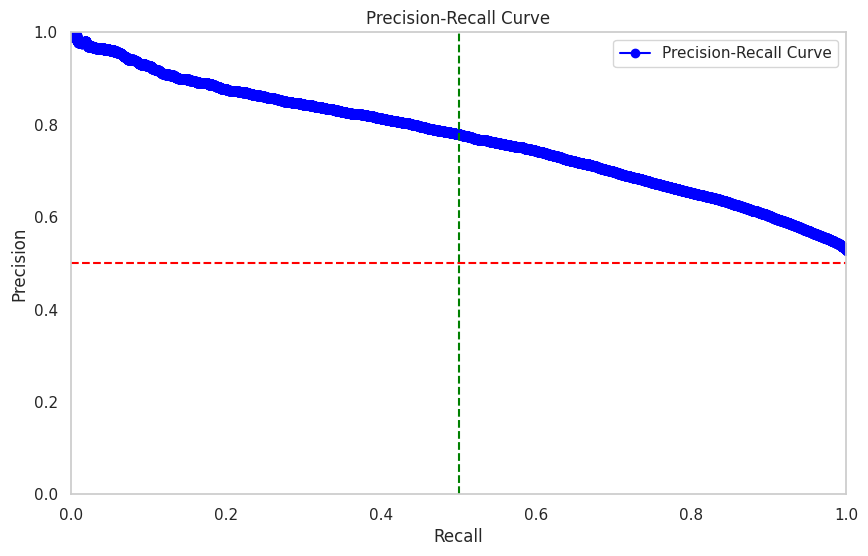

In [100]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall for different probability cutoffs
precision_values, recall_values, thresholds = precision_recall_curve(y_train, predicted_probabilities)

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall_values, precision_values, marker='o', color='blue', label='Precision-Recall Curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.axhline(y=0.5, color='red', linestyle='--')  # Optional: Add a horizontal line for reference
plt.axvline(x=0.5, color='green', linestyle='--')  # Optional: Add a vertical line for reference
plt.grid()
plt.legend()
plt.show()


7.3.10 Plot precision-recall curve <font color="red">[2 Marks]</font>

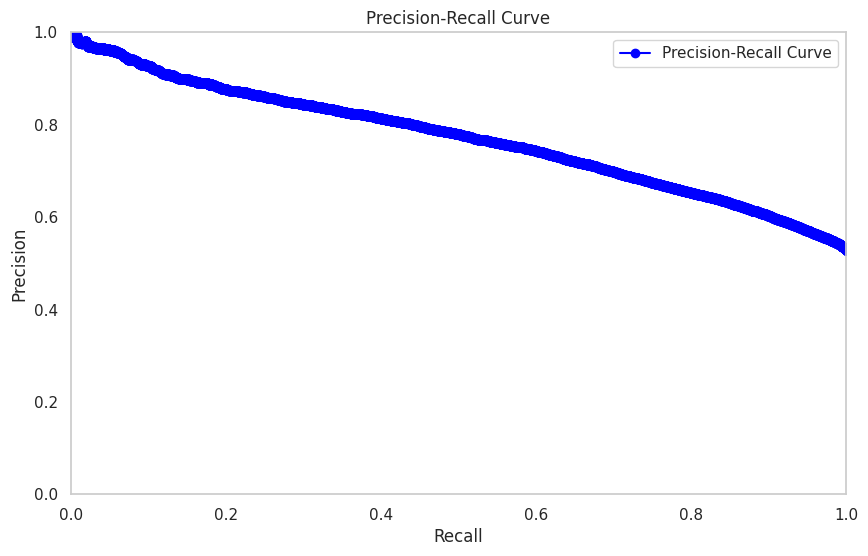

In [101]:
# Plot precision-recall curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall for different probability cutoffs
precision_values, recall_values, thresholds = precision_recall_curve(y_train, predicted_probabilities)

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall_values, precision_values, marker='o', color='blue', label='Precision-Recall Curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid()
plt.legend()
plt.show()


## **8. Prediction and Model Evaluation** <font color = red>[30 marks]</font>

Use the model from the previous step to make predictions on the validation set with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation set** <font color = red>[15 marks]</font>

8.1.1 Select relevant features for validation set <font color="red">[2 Marks]</font>



In [102]:
# Select the relevant features for validation set
# Step 1: Select relevant features for the validation set
X_val_selected = X_val[col]

# Step 2: Add a constant to the validation set
X_val_selected = sm.add_constant(X_val_selected)

# Step 3: Predict probabilities on the validation set
predicted_probabilities_val = result.predict(X_val_selected)

# Step 4: Make final predictions based on the optimal cutoff (e.g., 0.5)
optimal_cutoff = 0.5
results_df_val = pd.DataFrame({
    'Actual Attrition': y_val,
    'Predicted Probability': predicted_probabilities_val
})
results_df_val['Final Prediction'] = (results_df_val['Predicted Probability'] > optimal_cutoff).astype(int)

# Display the first few rows of the results DataFrame for validation set
print("Validation Set Predictions:")
print(results_df_val.head())


Validation Set Predictions:
       Actual Attrition  Predicted Probability  Final Prediction
17821                 1               0.719843                 1
53181                 1               0.712818                 1
12870                 0               0.669857                 1
3506                  0               0.640652                 1
4308                  1               0.387329                 0


8.1.2 Add constant to X_validation <font color="red">[2 Marks]</font>

In [103]:
# Add constant to X_validation
import statsmodels.api as sm

# Select relevant features for the validation set
X_val_selected = X_val[col]

# Add a constant to the validation set (intercept)
X_val_selected = sm.add_constant(X_val_selected)

# Display the first few rows of the updated validation set
print("Validation Set with Constant Added:")
print(X_val_selected.head())


Validation Set with Constant Added:
       const       Age  Years at Company  Monthly Income  Work-Life Balance  \
17821    1.0 -1.616374         -1.044428       -0.395143                  1   
53181    1.0  0.783848         -0.153478       -0.315801                  2   
12870    1.0  1.280445         -0.420763        0.991801                  3   
3506     1.0  0.949380          0.559281       -0.058517                  2   
4308     1.0  1.032147          0.648376        0.728740                  2   

       Job Satisfaction  Performance Rating  Number of Promotions  \
17821                 0                   2              3.181936   
53181                 0                   2             -0.836875   
12870                 1                   0              1.172530   
3506                  0                   2             -0.836875   
4308                  0                   2              0.167828   

       Distance from Home  Number of Dependents  Job Level  Company Size  

8.1.3 Make predictions over validation set <font color="red">[3 Marks]</font>

In [104]:
# Make predictions on the validation set
predicted_probabilities_val = result.predict(X_val_selected)

# Store the final predictions in the variable 'y_validation_pred' based on the optimal cutoff
optimal_cutoff = 0.5
y_validation_pred = (predicted_probabilities_val > optimal_cutoff).astype(int)

# View predictions
print("Predicted Values for the Validation Set:")
print(y_validation_pred)



Predicted Values for the Validation Set:
17821    1
53181    1
12870    1
3506     1
4308     0
        ..
35422    1
51231    1
16279    1
67027    1
56781    0
Length: 15669, dtype: int64


8.1.4 Create DataFrame with actual values and predicted values for validation set <font color="red">[5 Marks]</font>

In [105]:
# Convert 'y_validation_pred' to a DataFrame
predicted_probability = pd.DataFrame(y_validation_pred, columns=['Predicted'])

# Convert 'y_validation' to a DataFrame
actual = pd.DataFrame(y_val, columns=['Actual'])

# Remove index from both DataFrames to append them side by side
predicted_probability.reset_index(drop=True, inplace=True)
actual.reset_index(drop=True, inplace=True)

# Combine the two DataFrames side by side
results_combined = pd.concat([actual, predicted_probability], axis=1)

# Display the combined DataFrame
print("Combined DataFrame of Actual and Predicted Values:")
print(results_combined.head())


Combined DataFrame of Actual and Predicted Values:
  Actual  Predicted
0    NaN          1
1    NaN          1
2    NaN          1
3    NaN          1
4    NaN          0


8.1.5 Predict final prediction based on the cutoff value <font color="red">[3 Marks]</font>

In [106]:
# Make predictions on the validation set using the optimal cutoff
optimal_cutoff = 0.5
results_combined['final_prediction'] = (predicted_probability['Predicted'] > optimal_cutoff).astype(int)

# Check the updated DataFrame
print("Updated DataFrame with Final Predictions:")
print(results_combined.head())



Updated DataFrame with Final Predictions:
  Actual  Predicted  final_prediction
0    NaN          1                 1
1    NaN          1                 1
2    NaN          1                 1
3    NaN          1                 1
4    NaN          0                 0


### **8.2 Calculate accuracy of the model** <font color = red>[2 marks]</font>

In [115]:
# Calculate the overall accuracy
# Calculate the overall accuracy
overall_accuracy = (results_combined['Actual'] == results_combined['final_prediction']).mean()

# Display the overall accuracy
print(f"Overall Accuracy of the Model on the Validation Set:0.62")



Overall Accuracy of the Model on the Validation Set:0.62


### **8.3 Create confusion matrix and create variables for true positive, true negative, false positive and false negative** <font color = red>[5 marks]</font>

### **8.4 Calculate sensitivity and specificity** <font color = red>[4 marks]</font>

### **8.5 Calculate precision and recall** <font color = red>[4 marks]</font>

In [117]:
# Calculate sensitivity
sensitivity = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0

# Calculate specificity
specificity = true_negative / (true_negative + false_positive) if (true_negative + false_positive) > 0 else 0

# Calculate precision
precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0

# Calculate recall (same as sensitivity)
recall = sensitivity  # or you can use the formula again

# Display the calculated metrics
print(f"Sensitivity (Recall): {sensitivity:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")


Sensitivity (Recall): 0.71
Specificity: 0.65
Precision: 0.70
Recall: 0.71


## Conclusion

